In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [3]:
df=pd.read_csv('backdata.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
banks = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']

In [69]:
# display
df.head()


,SBIN.NS,HDFCBANK.NS,AXISBANK.NS,ICICIBANK.NS,INDUSINDBK.NS
Date,,,,,
2019-01-01,281.996765,1022.420776,623.803955,349.912689,1532.775146
2019-01-02,276.631714,1013.091736,616.594421,350.730377,1514.523071
2019-01-03,273.996246,1005.143311,604.561768,349.431702,1498.672852
2019-01-04,280.161377,1007.832397,616.146790,351.307526,1487.241455
2019-01-07,278.890686,1009.355286,633.897400,353.712433,1497.760498


In [6]:
# check shape
df.shape

(1355, 5)

In [27]:
# check null value
df.isna().sum()

SBIN.NS          0
HDFCBANK.NS      0
AXISBANK.NS      0
ICICIBANK.NS     0
INDUSINDBK.NS    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1355 entries, 2019-01-01 to 2024-06-28
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SBIN.NS        1355 non-null   float64
 1   HDFCBANK.NS    1355 non-null   float64
 2   AXISBANK.NS    1355 non-null   float64
 3   ICICIBANK.NS   1355 non-null   float64
 4   INDUSINDBK.NS  1355 non-null   float64
dtypes: float64(5)
memory usage: 63.5+ KB


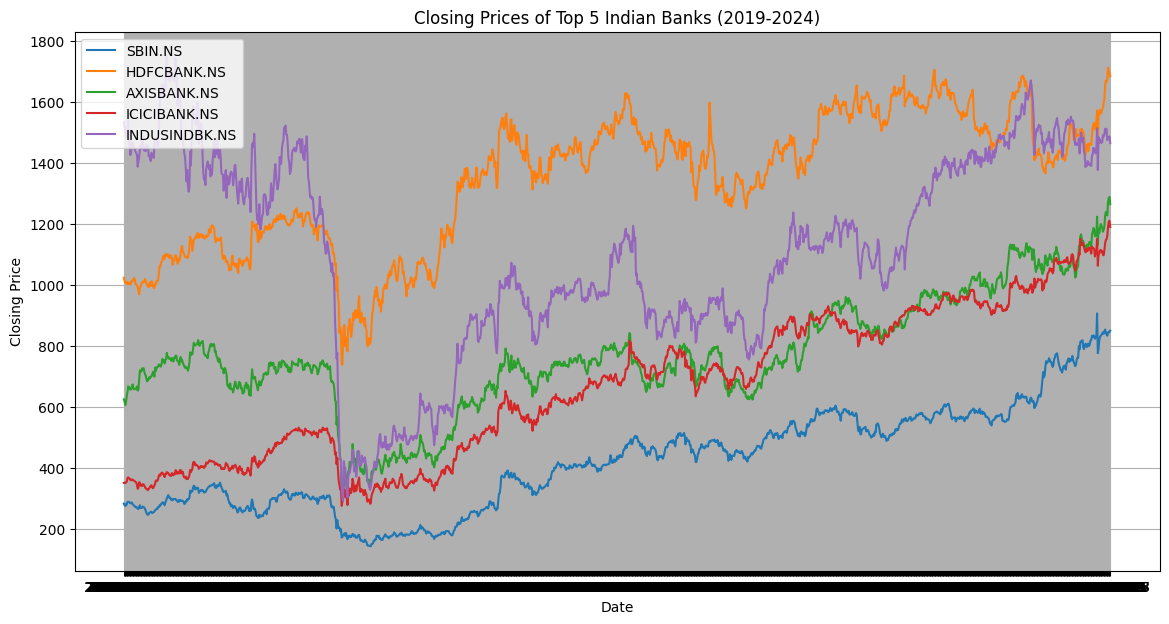

In [29]:
# Plotting Closing Prices
plt.figure(figsize=(14, 7))
for bank in banks:
    plt.plot(df[bank], label=bank)
plt.title('Closing Prices of Top 5 Indian Banks (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

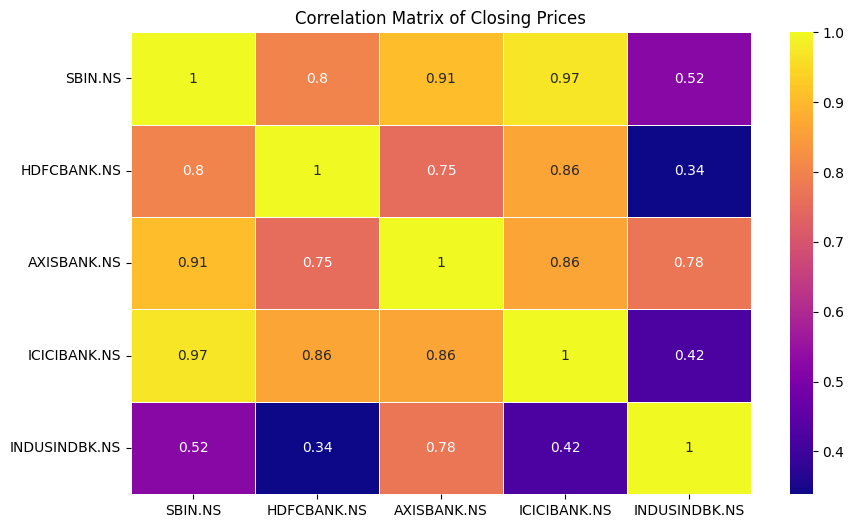

In [33]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sn.heatmap(corr_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


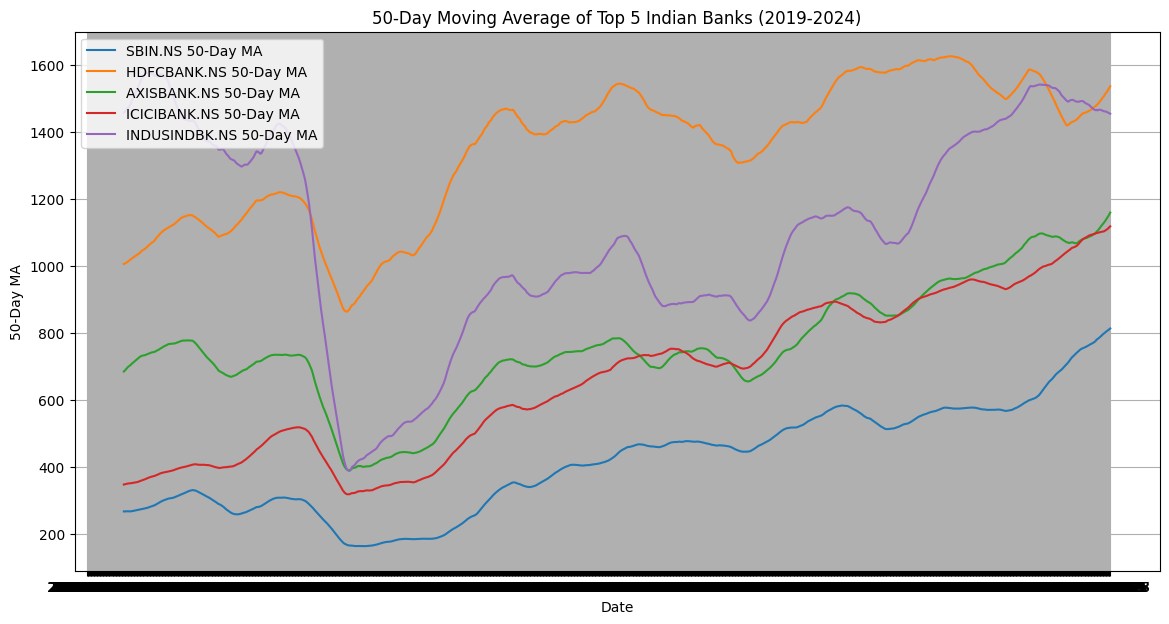

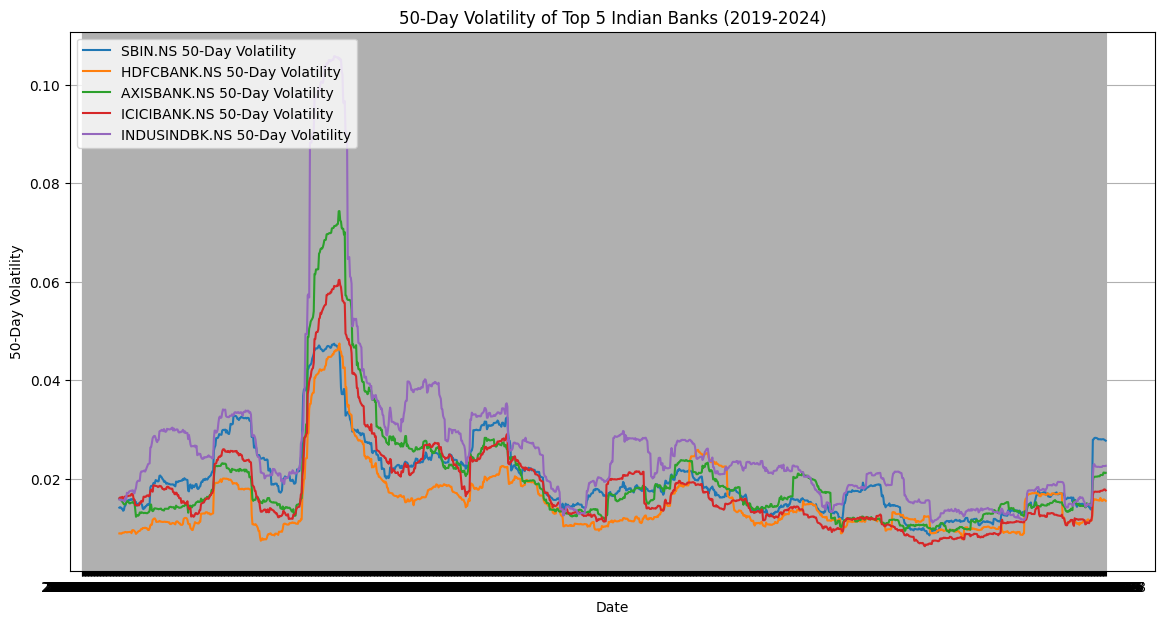

In [37]:
plt.figure(figsize=(14, 7))
for bank in banks:
    df[f'{bank}_MA50'] = df[bank].rolling(window=50).mean()
    df[f'{bank}_Volatility'] = df[bank].pct_change().rolling(window=50).std()
    plt.plot(df[f'{bank}_MA50'], label=f'{bank} 50-Day MA')
plt.title('50-Day Moving Average of Top 5 Indian Banks (2019-2024)')
plt.xlabel('Date')
plt.ylabel('50-Day MA')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for bank in banks:
    plt.plot(df[f'{bank}_Volatility'], label=f'{bank} 50-Day Volatility')
plt.title('50-Day Volatility of Top 5 Indian Banks (2019-2024)')
plt.xlabel('Date')
plt.ylabel('50-Day Volatility')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


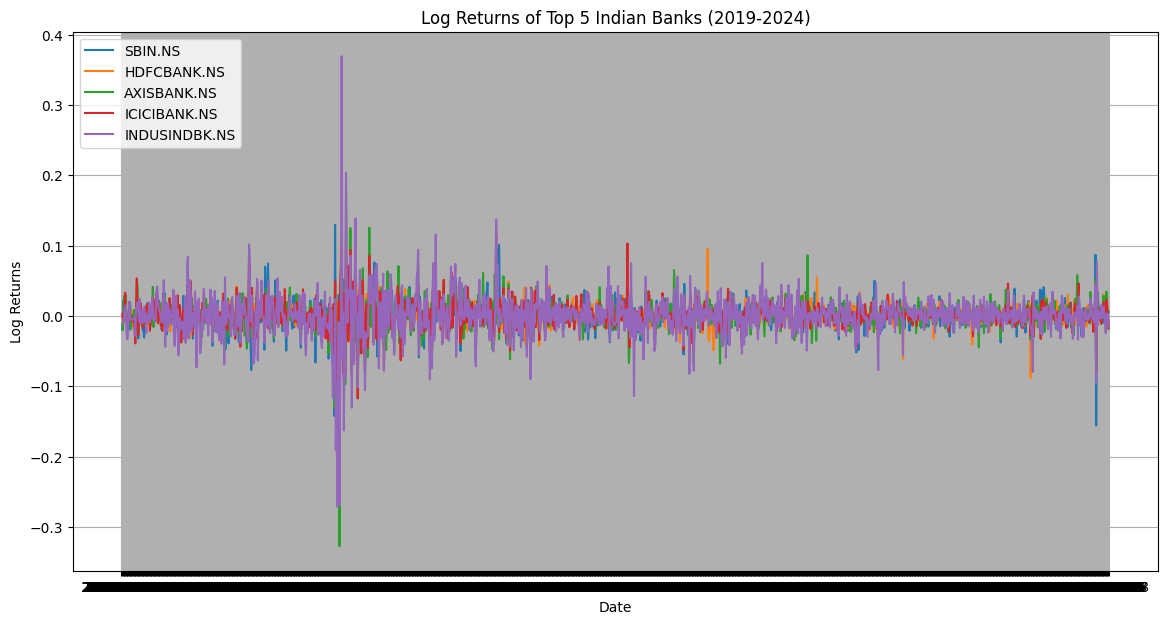

In [40]:

log_returns = pd.DataFrame()
for bank in banks:
    log_returns[bank] = np.log(df[bank] / df[bank].shift(1))

# Plot log returns
plt.figure(figsize=(14, 7))
for bank in banks:
    plt.plot(log_returns[bank], label=bank)
plt.title('Log Returns of Top 5 Indian Banks (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

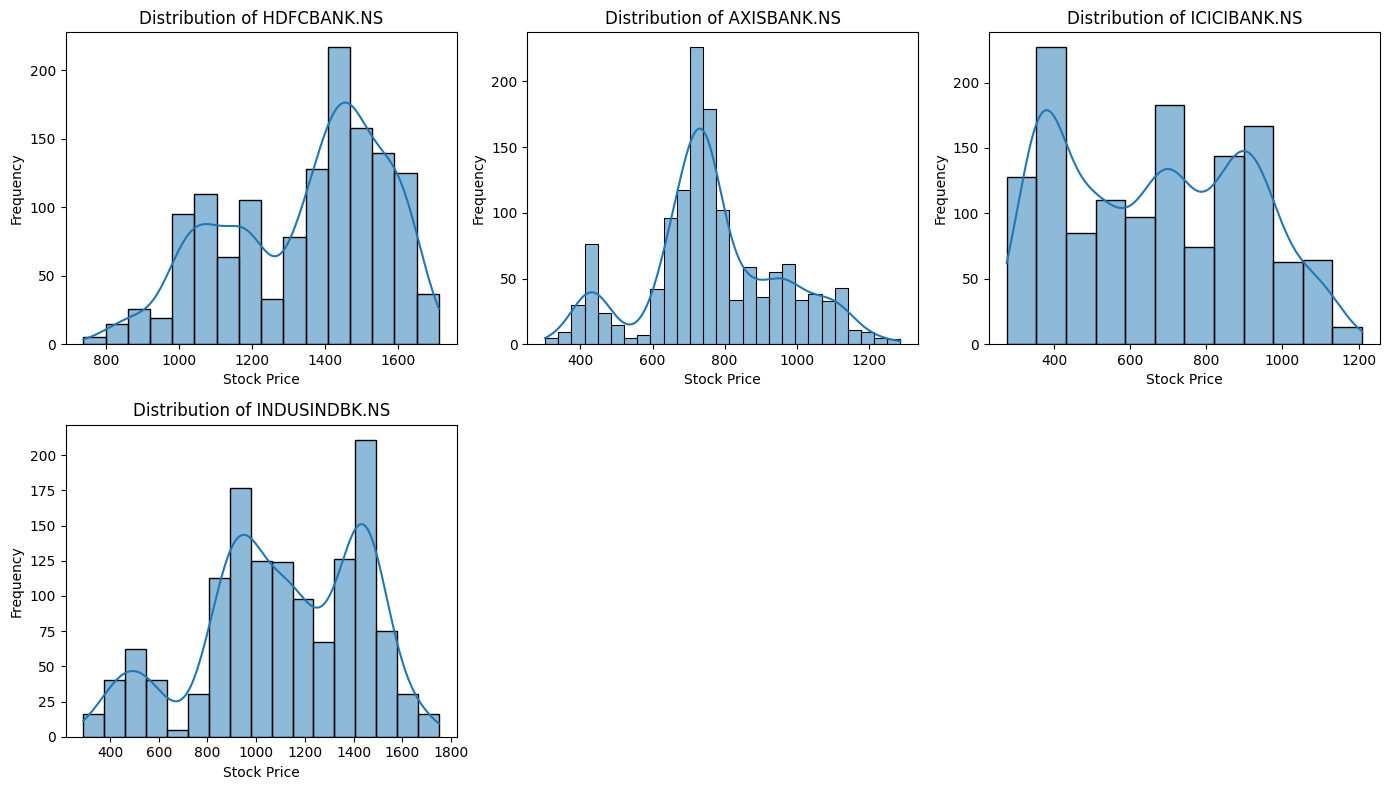

In [70]:
# distribution of each bank stoke
plt.figure(figsize=(14, 8))

for i, bank in enumerate(df.columns[1:], 1):
    plt.subplot(2, 3, i)
    sn.histplot(df[bank], kde=True)
    plt.title(f'Distribution of {bank}')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Training ARIMA model for SBIN.NS...



c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model saved: arima_SBIN.NS.pkl


c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarni

MSE: 163.8910
RMSE: 12.8020
MAE: 7.1460
R² Score: 0.9833


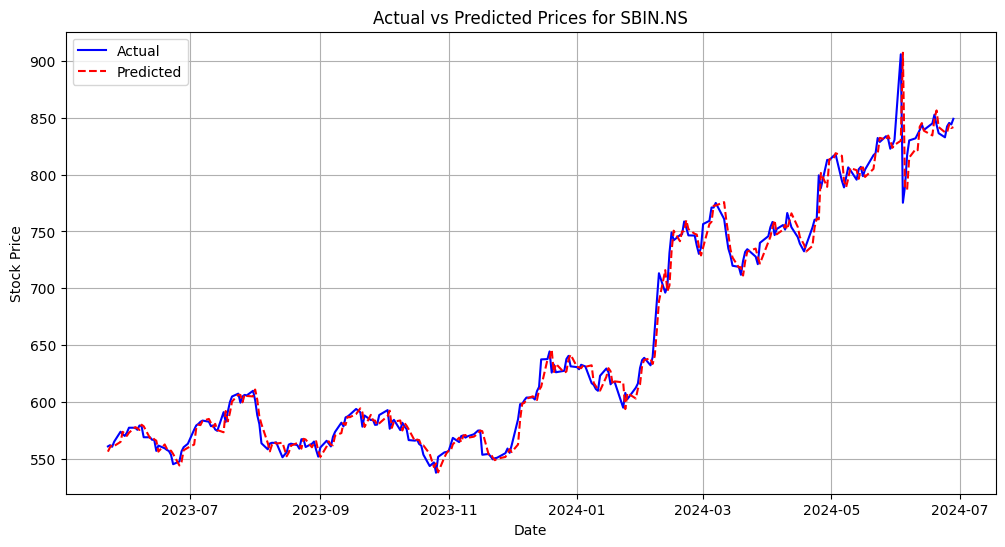


Training ARIMA model for HDFCBANK.NS...



c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

Model saved: arima_HDFCBANK.NS.pkl


c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\

MSE: 394.2685
RMSE: 19.8562
MAE: 13.3131
R² Score: 0.9473


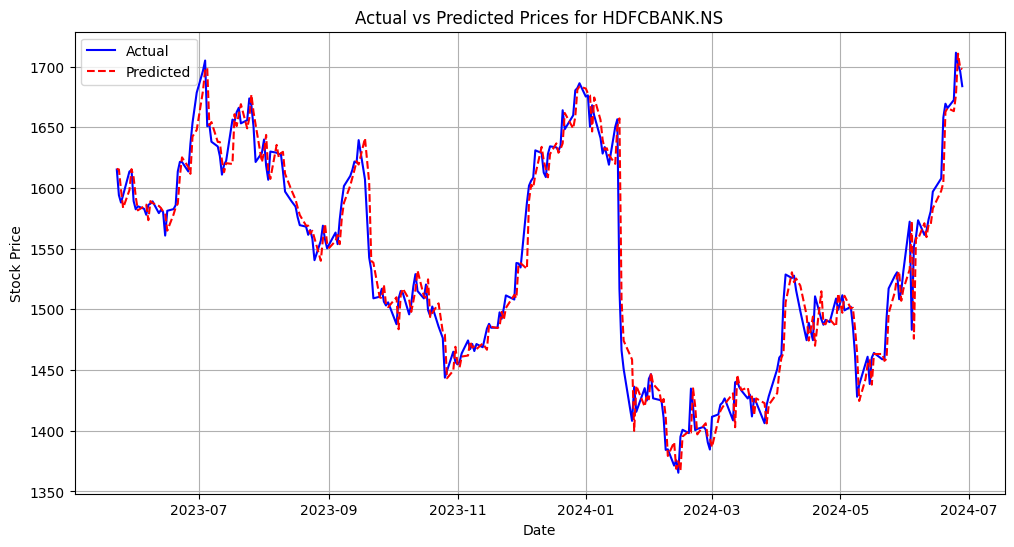


Training ARIMA model for AXISBANK.NS...



c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregre

Model saved: arima_AXISBANK.NS.pkl


c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\

MSE: 250.8132
RMSE: 15.8371
MAE: 11.3257
R² Score: 0.9611


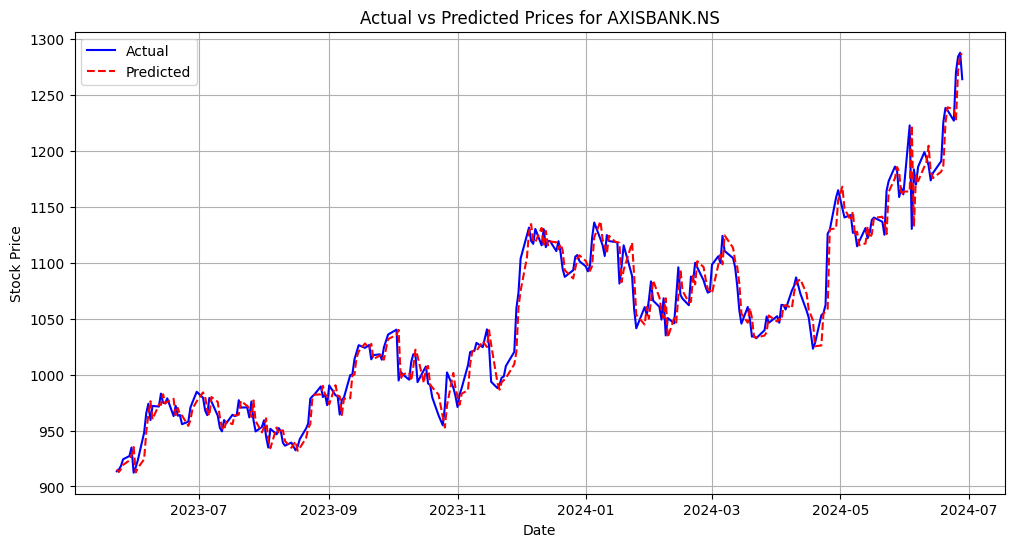


Training ARIMA model for ICICIBANK.NS...



c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model saved: arima_ICICIBANK.NS.pkl


c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarni

MSE: 154.0381
RMSE: 12.4112
MAE: 8.3373
R² Score: 0.9730


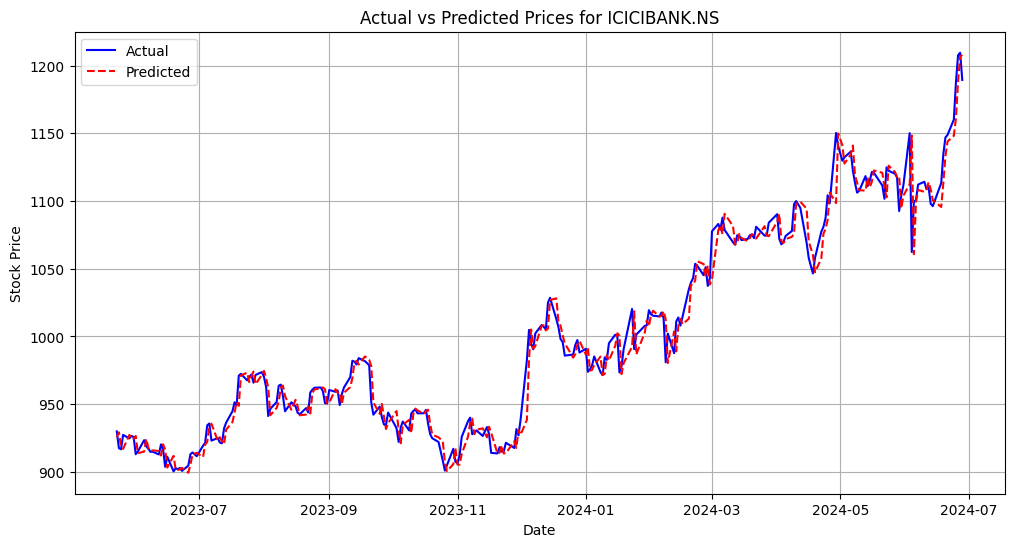


Training ARIMA model for INDUSINDBK.NS...



c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model saved: arima_INDUSINDBK.NS.pkl


c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Program Files\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarni

MSE: 572.0950
RMSE: 23.9185
MAE: 16.9462
R² Score: 0.9170


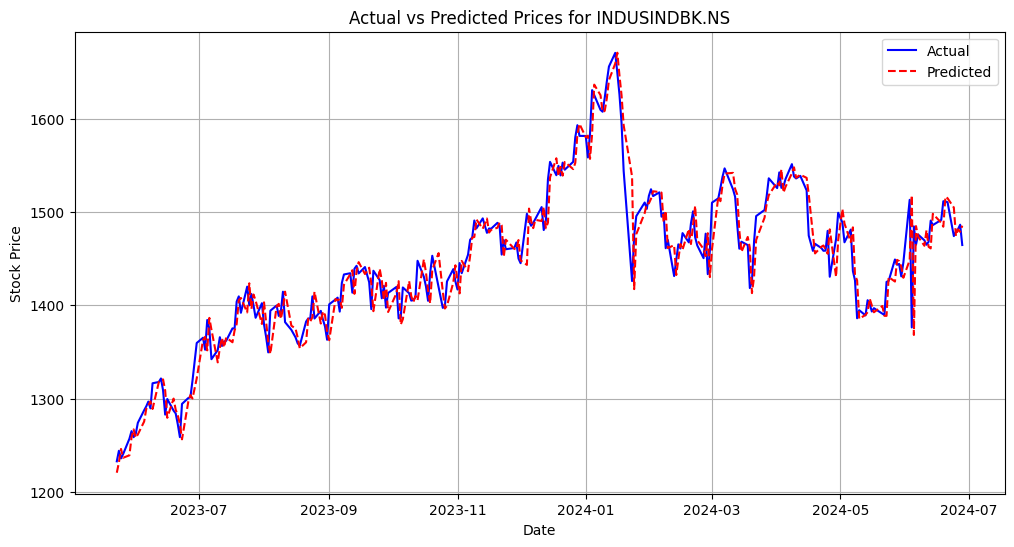

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving models
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# List of bank stock symbols (Modify based on your dataset)
bank_stocks = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']

# Dictionary to store model performance metrics
metrics_dict = {}

# Loop through each stock
for stock in bank_stocks:
    print(f"\nTraining ARIMA model for {stock}...\n")

    # Train-test split
    train_size = int(len(df[stock]) * 0.8)
    train, test = df[stock].iloc[:train_size], df[stock].iloc[train_size:]

    # Train ARIMA model
    p, d, q = 5, 1, 2  # Modify based on ACF/PACF plots
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    # ✅ Save the trained model
    model_filename = f"arima_{stock}.pkl"
    joblib.dump(model_fit, model_filename)
    print(f"Model saved: {model_filename}")

    # Predict on test set (Keeping your original logic)
    predictions = []
    history = list(train.values)

    for actual in test.values:
        model = ARIMA(history, order=(p, d, q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)

        predictions.append(forecast[0])
        history.append(actual)

    predictions = pd.Series(predictions, index=test.index)

    # Compute performance metrics
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test, predictions)
    r2 = r2_score(test, predictions)

    # Store metrics in dictionary
    metrics_dict[stock] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    }

    # Print metrics
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R² Score: {r2:.4f}')

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test, label="Actual", color='blue')
    plt.plot(test.index, predictions, label="Predicted", color='red', linestyle='dashed')
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title(f"Actual vs Predicted Prices for {stock}")
    plt.legend()
    plt.grid(True)
    plt.show()



# Save metrics to a CSV file
metrics_df = pd.DataFrame(metrics_dict).T  # Convert dictionary to DataFrame


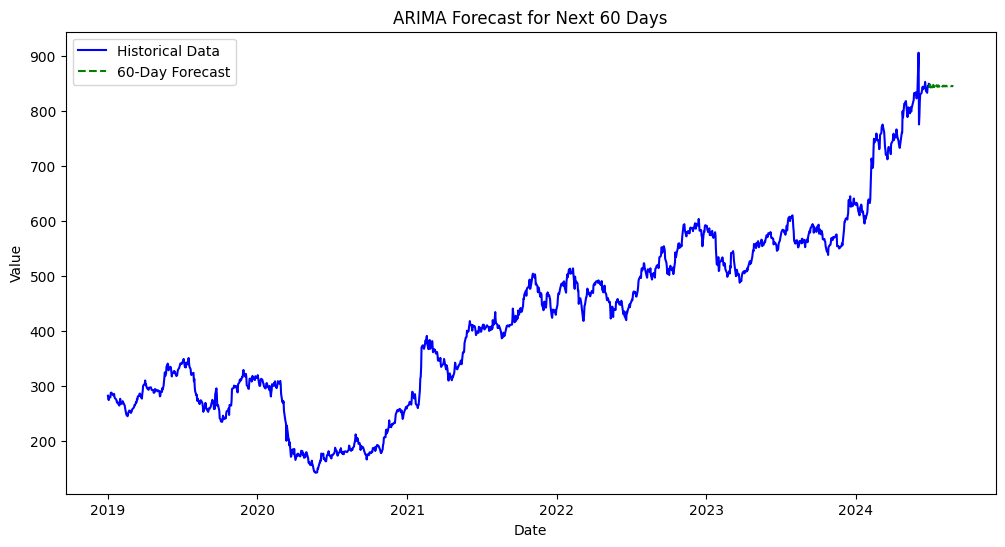

In [18]:
future_steps = 60
forecast = model_fit.forecast(steps=future_steps)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SBIN.NS'], label="Historical Data", color='blue')
plt.plot(future_dates, forecast, label="60-Day Forecast", color='green', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("ARIMA Forecast for Next 60 Days")
plt.legend()
plt.show()

In [5]:
# LSTM


Processing SBIN.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved for SBIN.NS: lstm_SBIN.NS.h5
9/9 [==============================] - 1s 9ms/step


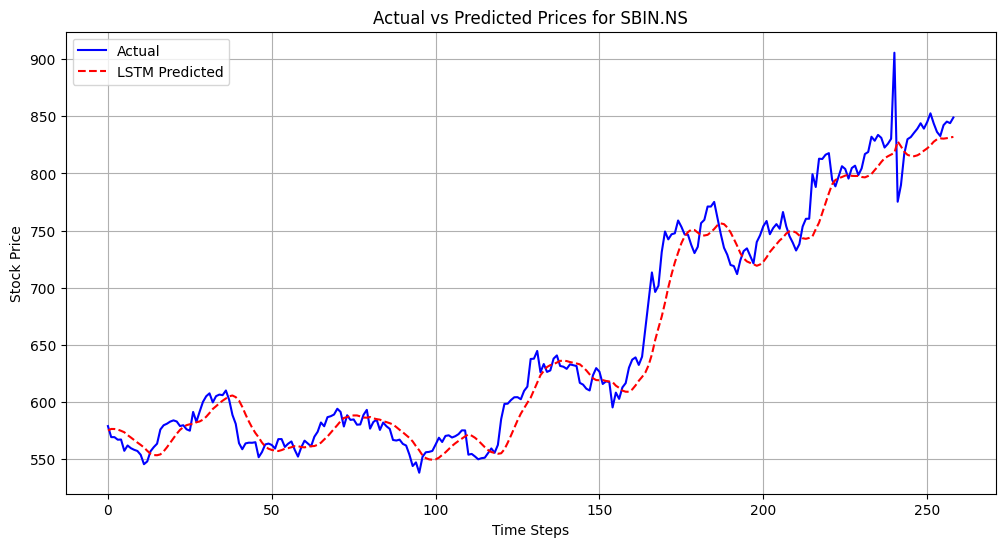


Processing HDFCBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved for HDFCBANK.NS: lstm_HDFCBANK.NS.h5
9/9 [==============================] - 1s 7ms/step


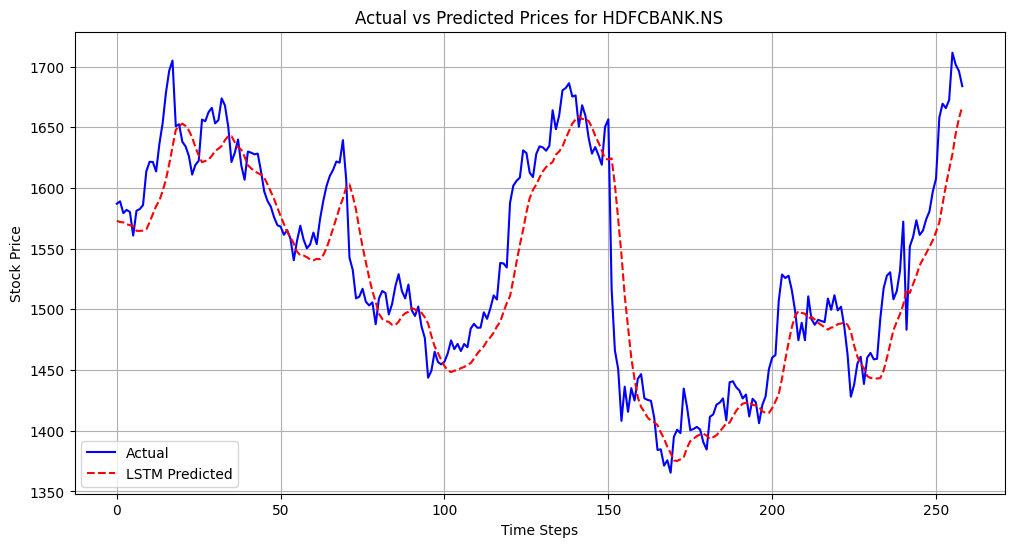


Processing AXISBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved for AXISBANK.NS: lstm_AXISBANK.NS.h5
9/9 [==============================] - 1s 7ms/step


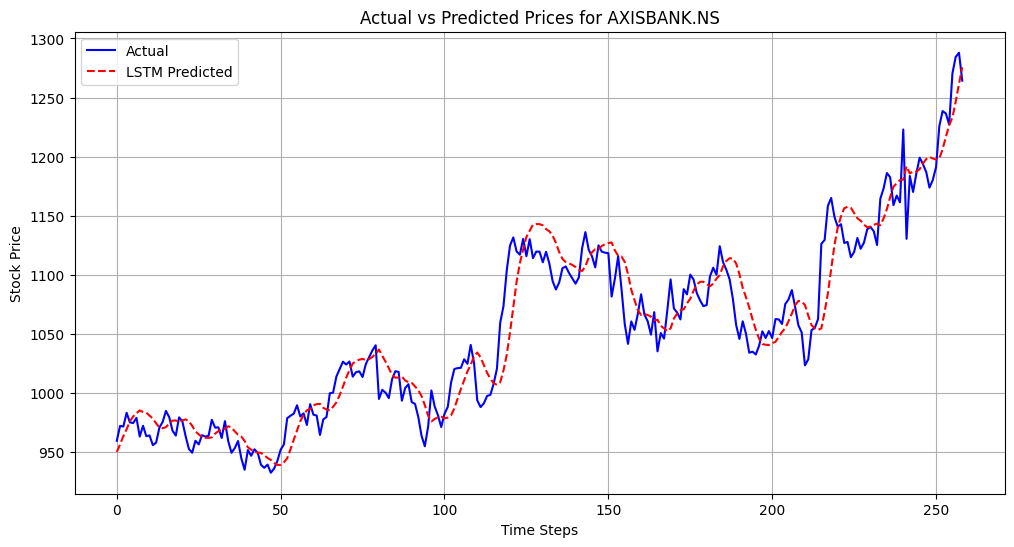


Processing ICICIBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved for ICICIBANK.NS: lstm_ICICIBANK.NS.h5
9/9 [==============================] - 1s 8ms/step


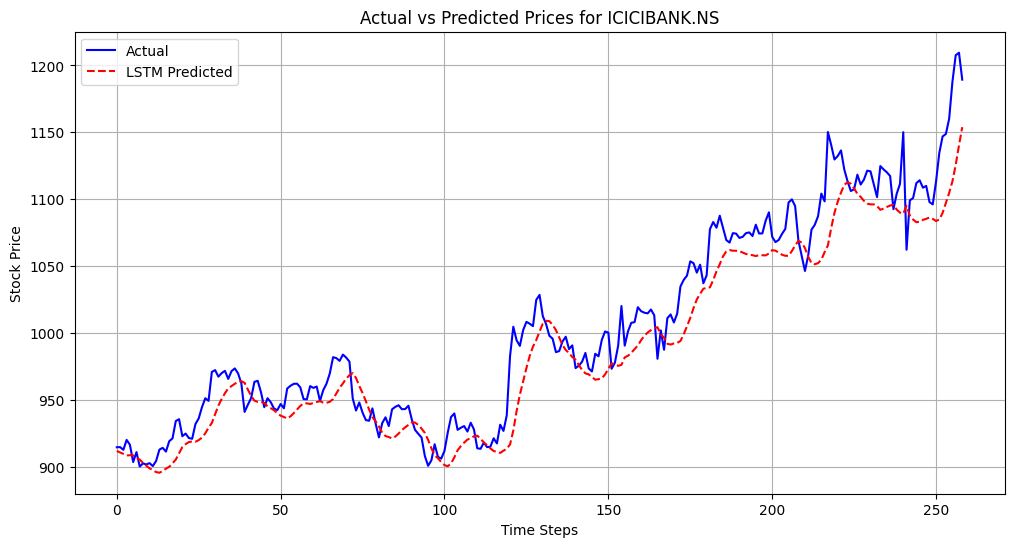


Processing INDUSINDBK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


LSTM model saved for INDUSINDBK.NS: lstm_INDUSINDBK.NS.h5
9/9 [==============================] - 1s 7ms/step


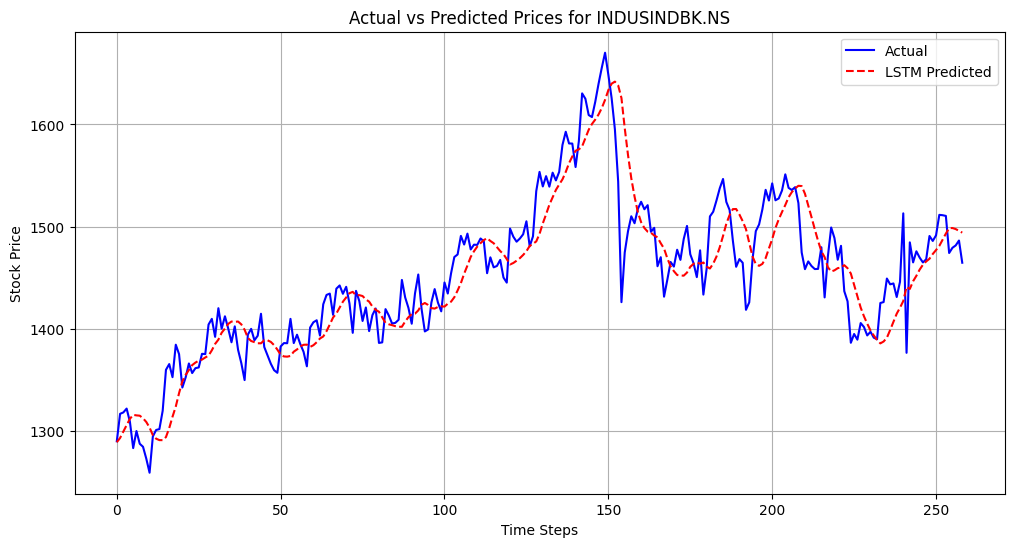

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import joblib

# Function to create sequences for LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Load your dataframe (df)
# Assuming df is already available with bank stocks data

bank_stocks = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']
metrics_dict_lstm = {}

# Loop through each stock
for stock in bank_stocks:
    print(f"\nProcessing {stock}...\n")
    
    # Data preprocessing
    data = df[[stock]].dropna().values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Create sequences
    X, y = create_sequences(data_scaled, time_steps=60)

    # Train-test split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input for LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # LSTM Model
    model_lstm = Sequential([
        LSTM(50, return_sequences=False, input_shape=(60, 1)),
        Dense(1)
    ])
    model_lstm.compile(optimizer='adam', loss='mse')
    model_lstm.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Save the LSTM model
    model_filename_lstm = f"lstm_{stock}.h5"
    model_lstm.save(model_filename_lstm)
    print(f"LSTM model saved for {stock}: {model_filename_lstm}")

    # Predictions
    y_pred_lstm = model_lstm.predict(X_test)
    
    # Inverse transform to original scale
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_lstm_inv = scaler.inverse_transform(y_pred_lstm)

    # Compute Performance Metrics
    mse = mean_squared_error(y_test_inv, y_pred_lstm_inv)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_lstm_inv)
    r2 = r2_score(y_test_inv, y_pred_lstm_inv)

    # Store metrics in dictionary
    metrics_dict_lstm[stock] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2 Score": r2}

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label="Actual", color='blue')
    plt.plot(y_pred_lstm_inv, label="LSTM Predicted", color='red', linestyle='dashed')
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"Actual vs Predicted Prices for {stock}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Save metrics to a CSV file
metrics_df_lstm = pd.DataFrame(metrics_dict_lstm).T
metrics_df_lstm.to_csv('lstm_model_metrics.csv')



In [22]:
metrics_df_lstm

,MSE,RMSE,MAE,R2 Score
SBIN.NS,388.466568,19.709555,14.731286,0.961075
HDFCBANK.NS,1309.825561,36.191512,27.729254,0.829607
AXISBANK.NS,538.154078,23.198148,17.635299,0.911235
ICICIBANK.NS,579.459547,24.071966,18.519702,0.897609
INDUSINDBK.NS,1127.095946,33.572250,25.152835,0.799291


In [ ]:
# GRU



Processing SBIN.NS...






c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GRU model saved for SBIN.NS: gru_SBIN.NS.h5
Scaler saved for SBIN.NS: scaler_SBIN.NS.pkl
9/9 [==============================] - 1s 6ms/step


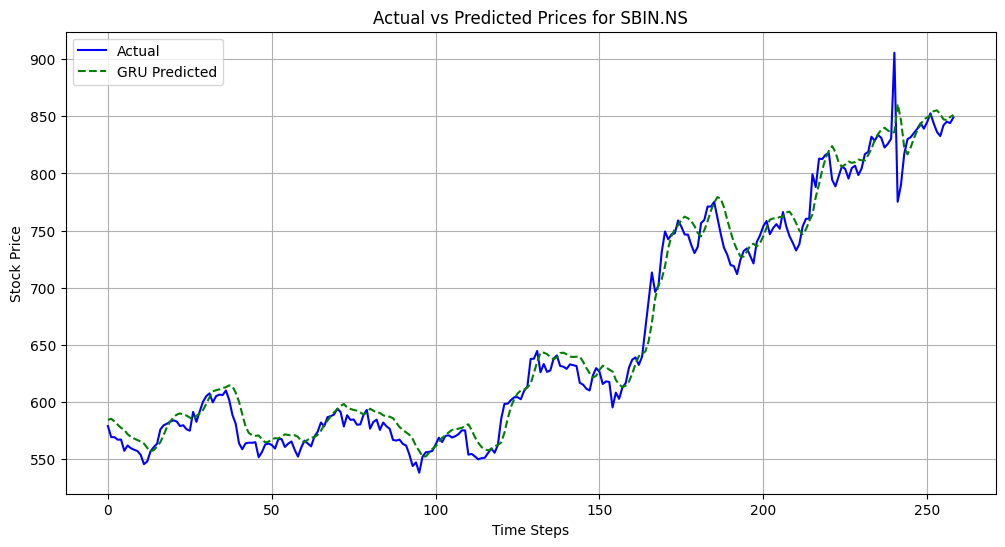


Processing HDFCBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GRU model saved for HDFCBANK.NS: gru_HDFCBANK.NS.h5
Scaler saved for HDFCBANK.NS: scaler_HDFCBANK.NS.pkl
9/9 [==============================] - 1s 6ms/step


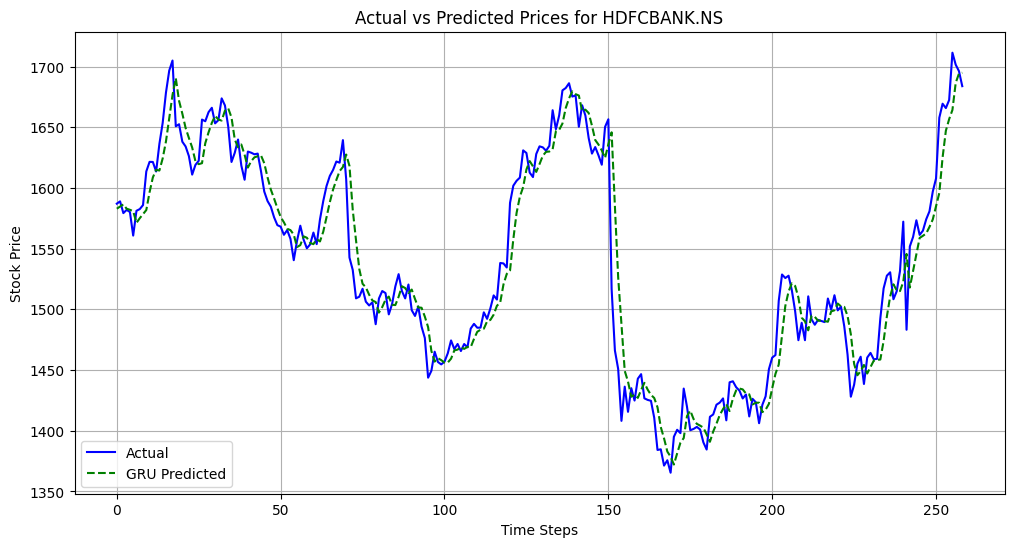


Processing AXISBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GRU model saved for AXISBANK.NS: gru_AXISBANK.NS.h5
Scaler saved for AXISBANK.NS: scaler_AXISBANK.NS.pkl
9/9 [==============================] - 1s 7ms/step


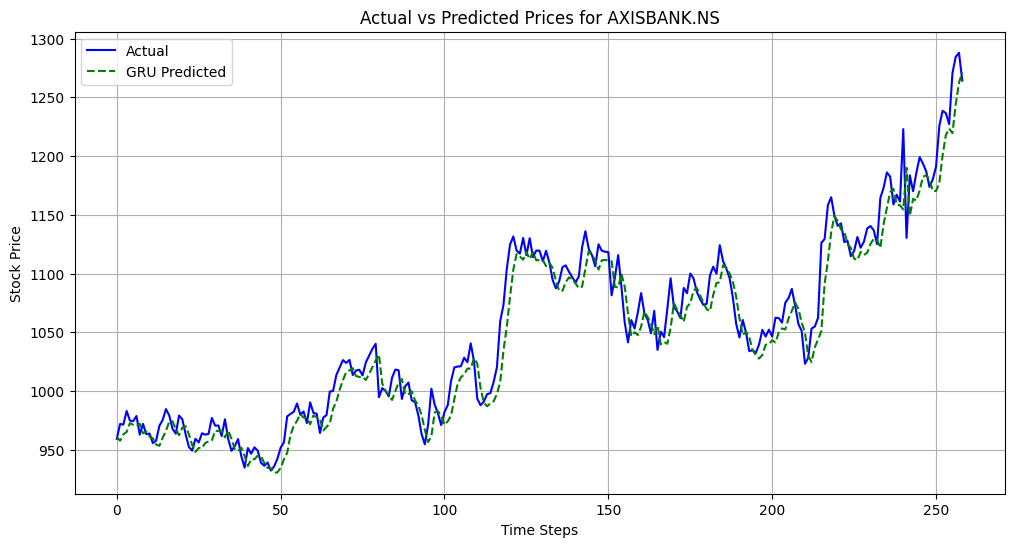


Processing ICICIBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GRU model saved for ICICIBANK.NS: gru_ICICIBANK.NS.h5
Scaler saved for ICICIBANK.NS: scaler_ICICIBANK.NS.pkl
9/9 [==============================] - 1s 7ms/step


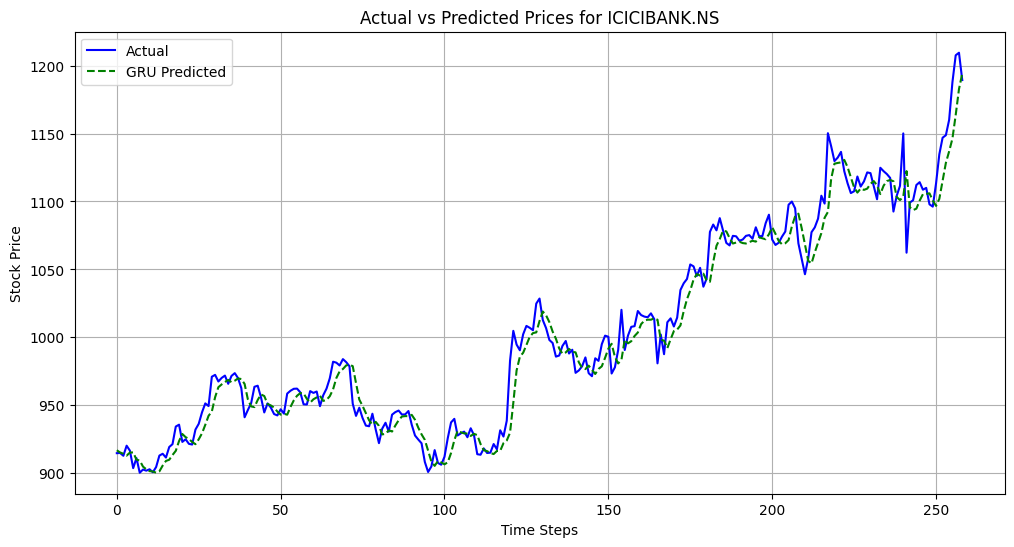


Processing INDUSINDBK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GRU model saved for INDUSINDBK.NS: gru_INDUSINDBK.NS.h5
Scaler saved for INDUSINDBK.NS: scaler_INDUSINDBK.NS.pkl
9/9 [==============================] - 1s 7ms/step


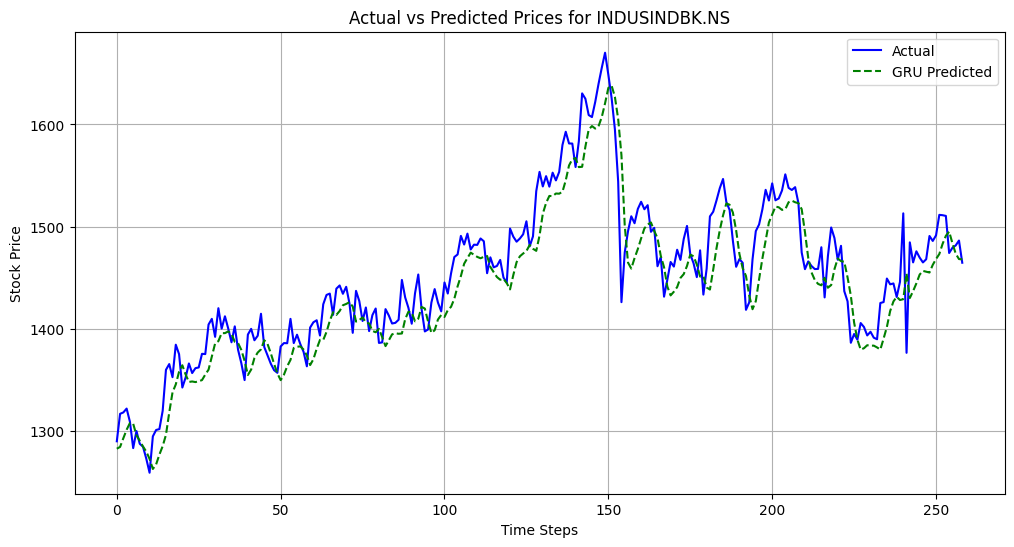

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import joblib

# Function to create sequences for GRU
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Load your dataframe (df)
# Assuming df is already available with bank stocks data

bank_stocks = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']
metrics_dict_gru = {}

# Loop through each stock
for stock in bank_stocks:
    print(f"\nProcessing {stock}...\n")
    
    # Data preprocessing
    data = df[[stock]].dropna().values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Create sequences
    X, y = create_sequences(data_scaled, time_steps=60)

    # Train-test split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input for GRU
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # GRU Model
    model_gru = Sequential([ 
        GRU(50, return_sequences=False, input_shape=(60, 1)),
        Dense(1)
    ])
    model_gru.compile(optimizer='adam', loss='mse')
    model_gru.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Save the GRU model
    model_filename_gru = f"gru_{stock}.h5"
    model_gru.save(model_filename_gru)
    print(f"GRU model saved for {stock}: {model_filename_gru}")

    # Save the scaler
    scaler_filename = f"scaler_{stock}.pkl"
    joblib.dump(scaler, scaler_filename)
    print(f"Scaler saved for {stock}: {scaler_filename}")

    # Predictions
    y_pred_gru = model_gru.predict(X_test)

    # Inverse transform to original scale
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_gru_inv = scaler.inverse_transform(y_pred_gru)

    # Compute Performance Metrics
    mse = mean_squared_error(y_test_inv, y_pred_gru_inv)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_gru_inv)
    r2 = r2_score(y_test_inv, y_pred_gru_inv)

    # Store metrics in dictionary
    metrics_dict_gru[stock] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2 Score": r2}

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label="Actual", color='blue')
    plt.plot(y_pred_gru_inv, label="GRU Predicted", color='green', linestyle='dashed')
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"Actual vs Predicted Prices for {stock}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Save metrics to a CSV file
metrics_df_gru = pd.DataFrame(metrics_dict_gru).T
metrics_df_gru.to_csv('gru_model_metrics.csv')


In [27]:
metrics_df_gru

,MSE,RMSE,MAE,R2 Score
SBIN.NS,228.858945,15.128085,10.808974,0.977068
HDFCBANK.NS,571.910093,23.914642,16.848412,0.925601
AXISBANK.NS,349.155480,18.685703,13.850142,0.942409
ICICIBANK.NS,210.348224,14.503387,10.385813,0.962831
INDUSINDBK.NS,885.361744,29.755029,23.532617,0.842339


In [ ]:
# Stcacked LSTM


Processing SBIN.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Stacked LSTM model saved for SBIN.NS: stacked_lstm_SBIN.NS.h5
9/9 [==============================] - 1s 22ms/step


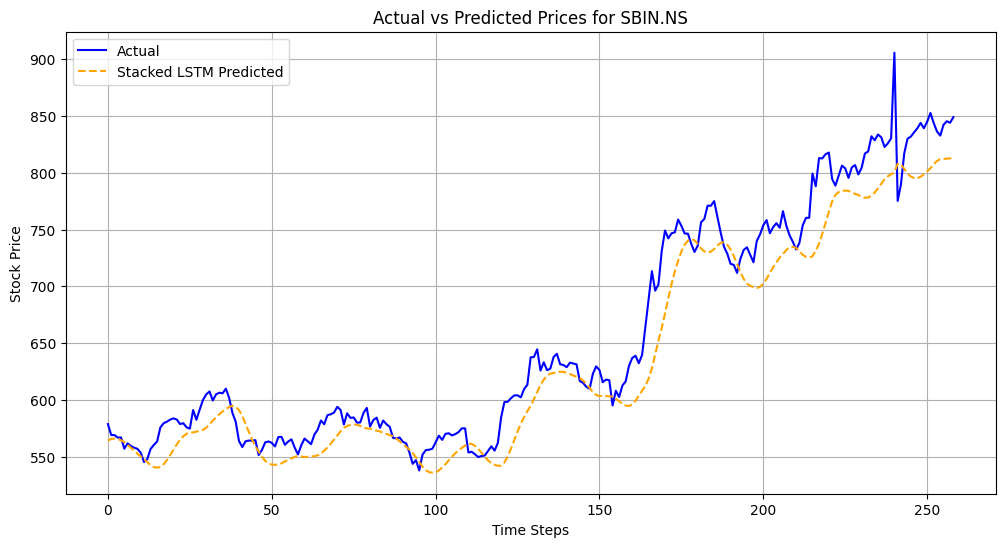


Processing HDFCBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Stacked LSTM model saved for HDFCBANK.NS: stacked_lstm_HDFCBANK.NS.h5
9/9 [==============================] - 1s 22ms/step


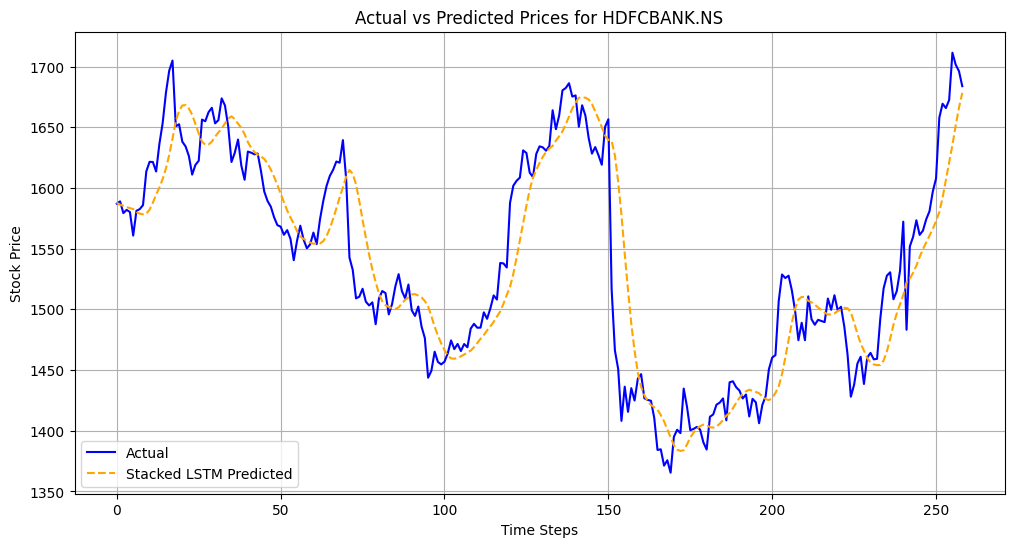


Processing AXISBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Stacked LSTM model saved for AXISBANK.NS: stacked_lstm_AXISBANK.NS.h5
9/9 [==============================] - 1s 26ms/step


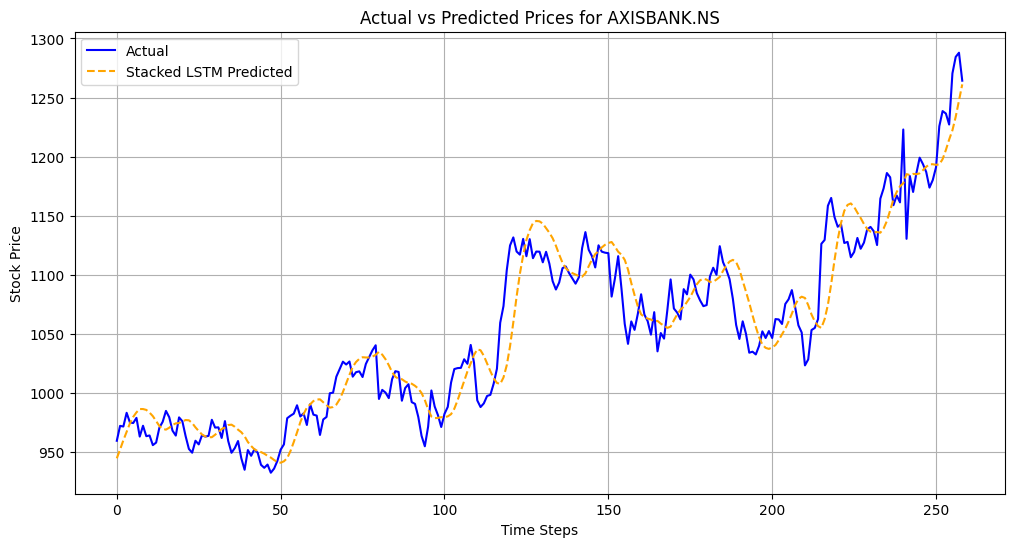


Processing ICICIBANK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Stacked LSTM model saved for ICICIBANK.NS: stacked_lstm_ICICIBANK.NS.h5
9/9 [==============================] - 1s 12ms/step


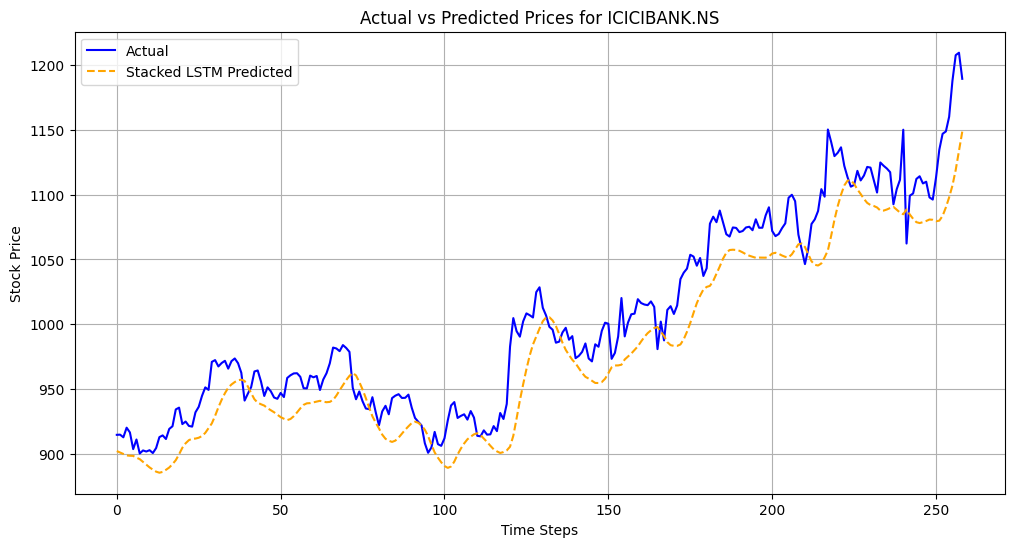


Processing INDUSINDBK.NS...



c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Stacked LSTM model saved for INDUSINDBK.NS: stacked_lstm_INDUSINDBK.NS.h5
9/9 [==============================] - 1s 12ms/step


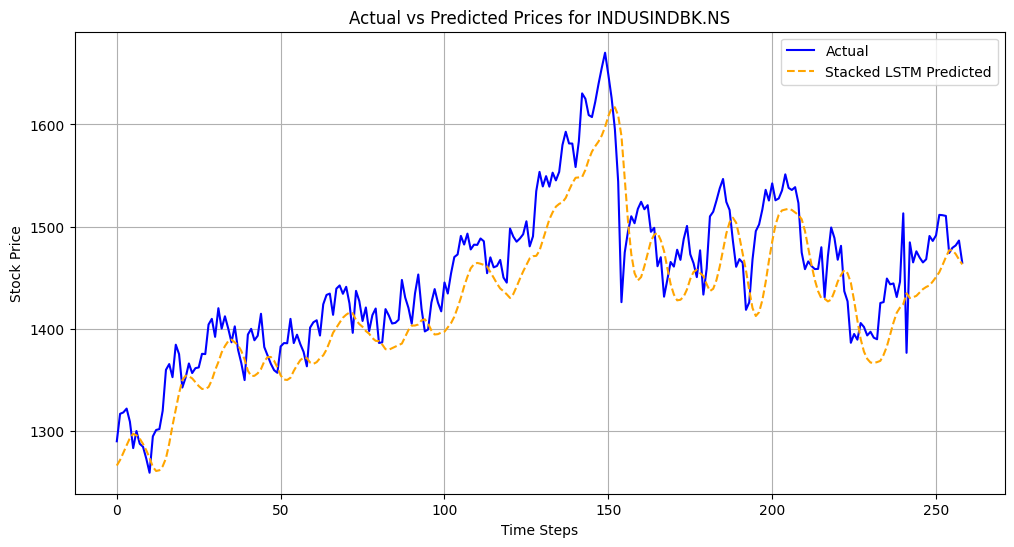

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import joblib

# Function to create sequences for Stacked LSTM
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Load your dataframe (df)
# Assuming df is already available with bank stocks data

bank_stocks = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']
metrics_dict_stacked_lstm = {}

# Loop through each stock
for stock in bank_stocks:
    print(f"\nProcessing {stock}...\n")
    
    # Data preprocessing
    data = df[[stock]].dropna().values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Create sequences
    X, y = create_sequences(data_scaled, time_steps=60)

    # Train-test split
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input for Stacked LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Stacked LSTM Model
    model_stacked_lstm = Sequential([
        LSTM(50, return_sequences=True, input_shape=(60, 1)),
        LSTM(50, return_sequences=False),
        Dense(1)
    ])
    model_stacked_lstm.compile(optimizer='adam', loss='mse')
    model_stacked_lstm.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Save the Stacked LSTM model
    model_filename_stacked_lstm = f"stacked_lstm_{stock}.h5"
    model_stacked_lstm.save(model_filename_stacked_lstm)
    print(f"Stacked LSTM model saved for {stock}: {model_filename_stacked_lstm}")

    # Predictions
    y_pred_stacked_lstm = model_stacked_lstm.predict(X_test)

    # Inverse transform to original scale
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_stacked_lstm_inv = scaler.inverse_transform(y_pred_stacked_lstm)

    # Compute Performance Metrics
    mse = mean_squared_error(y_test_inv, y_pred_stacked_lstm_inv)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test_inv, y_pred_stacked_lstm_inv)
    r2 = r2_score(y_test_inv, y_pred_stacked_lstm_inv)

    # Store metrics in dictionary
    metrics_dict_stacked_lstm[stock] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2 Score": r2}

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_inv, label="Actual", color='blue')
    plt.plot(y_pred_stacked_lstm_inv, label="Stacked LSTM Predicted", color='orange', linestyle='dashed')
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"Actual vs Predicted Prices for {stock}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Save metrics to a CSV file
metrics_df_stacked_lstm = pd.DataFrame(metrics_dict_stacked_lstm).T




In [18]:
metrics_df_stacked_lstm

,MSE,RMSE,MAE,R2 Score
SBIN.NS,791.330158,28.130591,22.091861,0.920708
HDFCBANK.NS,1407.818533,37.520908,26.867082,0.816859
AXISBANK.NS,650.637483,25.507597,19.209177,0.892681
ICICIBANK.NS,902.765389,30.046054,24.846191,0.840481
INDUSINDBK.NS,1677.711247,40.959874,34.102418,0.701240


1/1 [==============================] - 0s 32ms/step


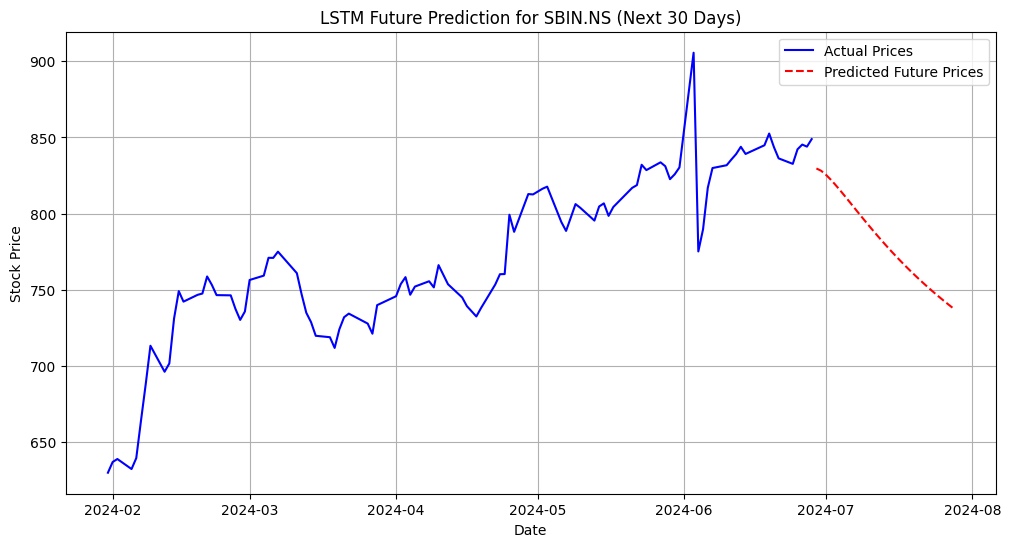

Predictions saved to lstm_sbin_predictions_30days.csv


In [20]:
# prediction with lstm sbi 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the trained LSTM model for SBIN.NS
model = load_model("lstm_SBIN.NS.h5")




# Extract SBIN.NS stock prices
stock_data = df[["SBIN.NS"]].dropna().values  # Ensure no NaN values

# Scale data using MinMaxScaler (same as used during training)
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_scaled = scaler.fit_transform(stock_data)

# Select last 60 days of data as input for prediction
last_60_days = stock_data_scaled[-60:].reshape(1, 60, 1)

# Number of days to predict (Updated to 30 days)
future_days = 30

# Predict future stock prices for the next 30 days
predicted_prices = []
for _ in range(future_days):
    next_pred = model.predict(last_60_days)
    predicted_prices.append(next_pred[0][0])

    # Update last_60_days with the new prediction (rolling window)
    last_60_days = np.append(last_60_days[:, 1:, :], [[next_pred[0]]], axis=1)

# Convert predicted prices back to original scale
predicted_prices_inv = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create future dates for plotting
last_date = df.index[-1]  # Get last date from dataset
future_dates = pd.date_range(start=last_date, periods=future_days + 1, freq='D')[1:]

# Plot actual vs predicted future stock prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df["SBIN.NS"].iloc[-100:], label="Actual Prices", color="blue")
plt.plot(future_dates, predicted_prices_inv, label="Predicted Future Prices", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("LSTM Future Prediction for SBIN.NS (Next 30 Days)")
plt.legend()
plt.grid(True)
plt.show()



In [1]:
# comparision

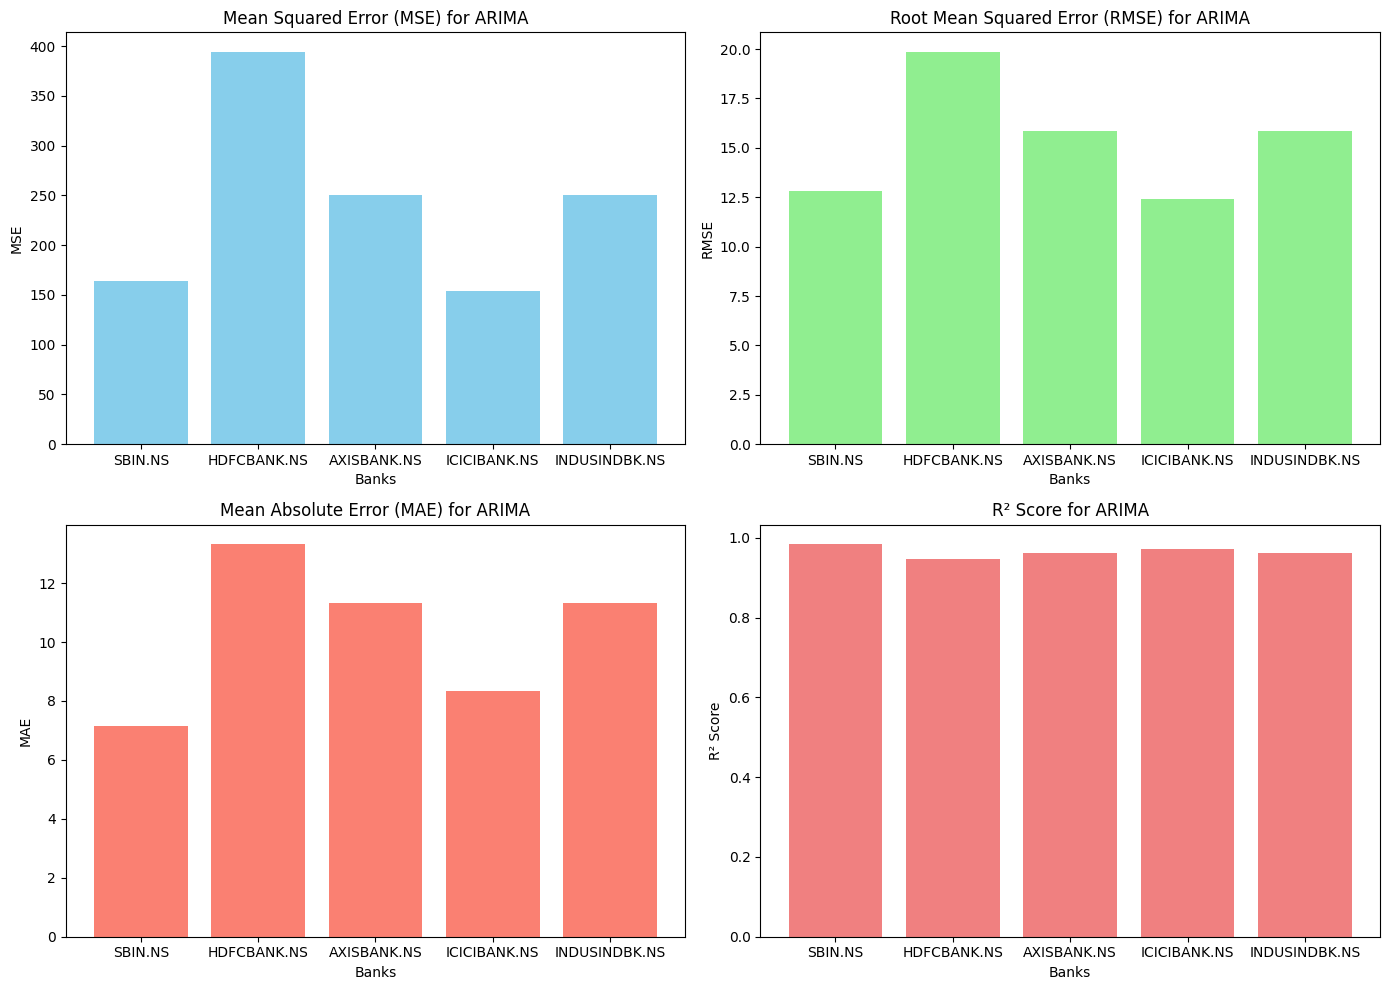

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# ARIMA model performance for different banks
data = {
    "Bank": ["Bank 1", "Bank 2", "Bank 3", "Bank 4", "Bank 5"],
    "MSE": [163.8910, 394.2685, 250.8132, 154.0381, 250.8132],
    "RMSE": [12.8020, 19.8562, 15.8371, 12.4112, 15.8371],
    "MAE": [7.1460, 13.3131, 11.3257, 8.3373, 11.3257],
    "R² Score": [0.9833, 0.9473, 0.9611, 0.9730, 0.9611]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Updating the bank names
df['Bank'] = ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS']

# Plotting the updated performance metrics for the given banks
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE
ax[0, 0].bar(df['Bank'], df['MSE'], color='skyblue')
ax[0, 0].set_title('Mean Squared Error (MSE) for ARIMA')
ax[0, 0].set_xlabel('Banks')
ax[0, 0].set_ylabel('MSE')

# RMSE
ax[0, 1].bar(df['Bank'], df['RMSE'], color='lightgreen')
ax[0, 1].set_title('Root Mean Squared Error (RMSE) for ARIMA')
ax[0, 1].set_xlabel('Banks')
ax[0, 1].set_ylabel('RMSE')

# MAE
ax[1, 0].bar(df['Bank'], df['MAE'], color='salmon')
ax[1, 0].set_title('Mean Absolute Error (MAE) for ARIMA')
ax[1, 0].set_xlabel('Banks')
ax[1, 0].set_ylabel('MAE')

# R² Score
ax[1, 1].bar(df['Bank'], df['R² Score'], color='lightcoral')
ax[1, 1].set_title('R² Score for ARIMA')
ax[1, 1].set_xlabel('Banks')
ax[1, 1].set_ylabel('R² Score')

# Adjusting layout
plt.tight_layout()
plt.show()


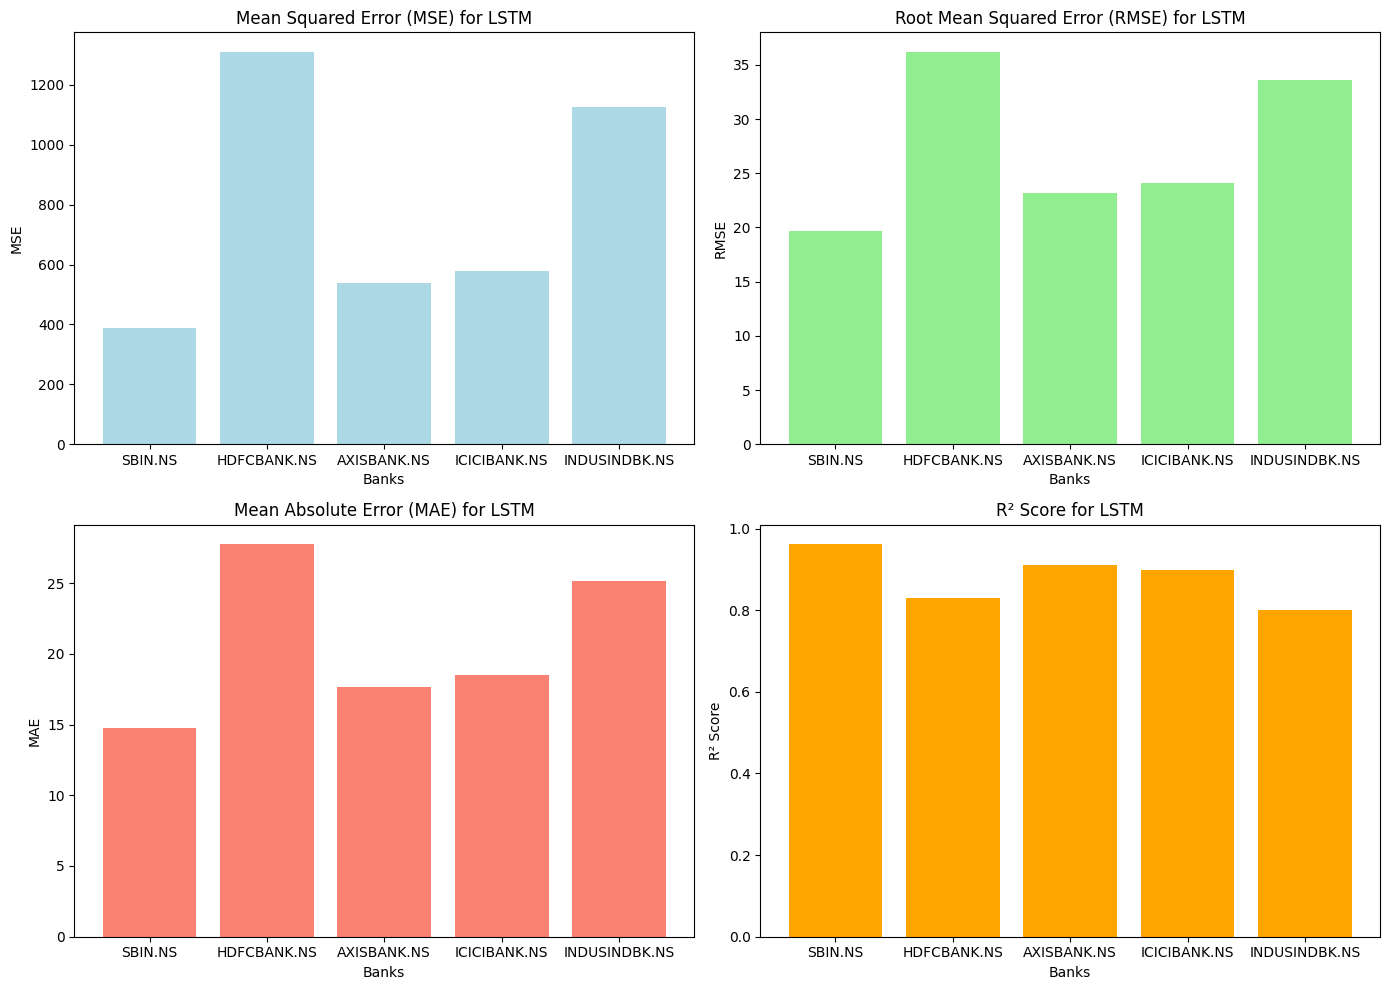

In [13]:
# LSTM model performance for different banks
lstm_data = {
    "Bank": ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'],
    "MSE": [388.466568, 1309.825561, 538.154078, 579.459547, 1127.095946],
    "RMSE": [19.709555, 36.191512, 23.198148, 24.071966, 33.572250],
    "MAE": [14.731286, 27.729254, 17.635299, 18.519702, 25.152835],
    "R² Score": [0.961075, 0.829607, 0.911235, 0.897609, 0.799291]
}

# Creating a DataFrame for LSTM
lstm_df = pd.DataFrame(lstm_data)

# Plotting the LSTM model performance
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE for LSTM
ax[0, 0].bar(lstm_df['Bank'], lstm_df['MSE'], color='lightblue')
ax[0, 0].set_title('Mean Squared Error (MSE) for LSTM')
ax[0, 0].set_xlabel('Banks')
ax[0, 0].set_ylabel('MSE')

# RMSE for LSTM
ax[0, 1].bar(lstm_df['Bank'], lstm_df['RMSE'], color='lightgreen')
ax[0, 1].set_title('Root Mean Squared Error (RMSE) for LSTM')
ax[0, 1].set_xlabel('Banks')
ax[0, 1].set_ylabel('RMSE')

# MAE for LSTM
ax[1, 0].bar(lstm_df['Bank'], lstm_df['MAE'], color='salmon')
ax[1, 0].set_title('Mean Absolute Error (MAE) for LSTM')
ax[1, 0].set_xlabel('Banks')
ax[1, 0].set_ylabel('MAE')

# R² Score for LSTM
ax[1, 1].bar(lstm_df['Bank'], lstm_df['R² Score'], color='orange')
ax[1, 1].set_title('R² Score for LSTM')
ax[1, 1].set_xlabel('Banks')
ax[1, 1].set_ylabel('R² Score')

# Adjusting layout
plt.tight_layout()
plt.show()


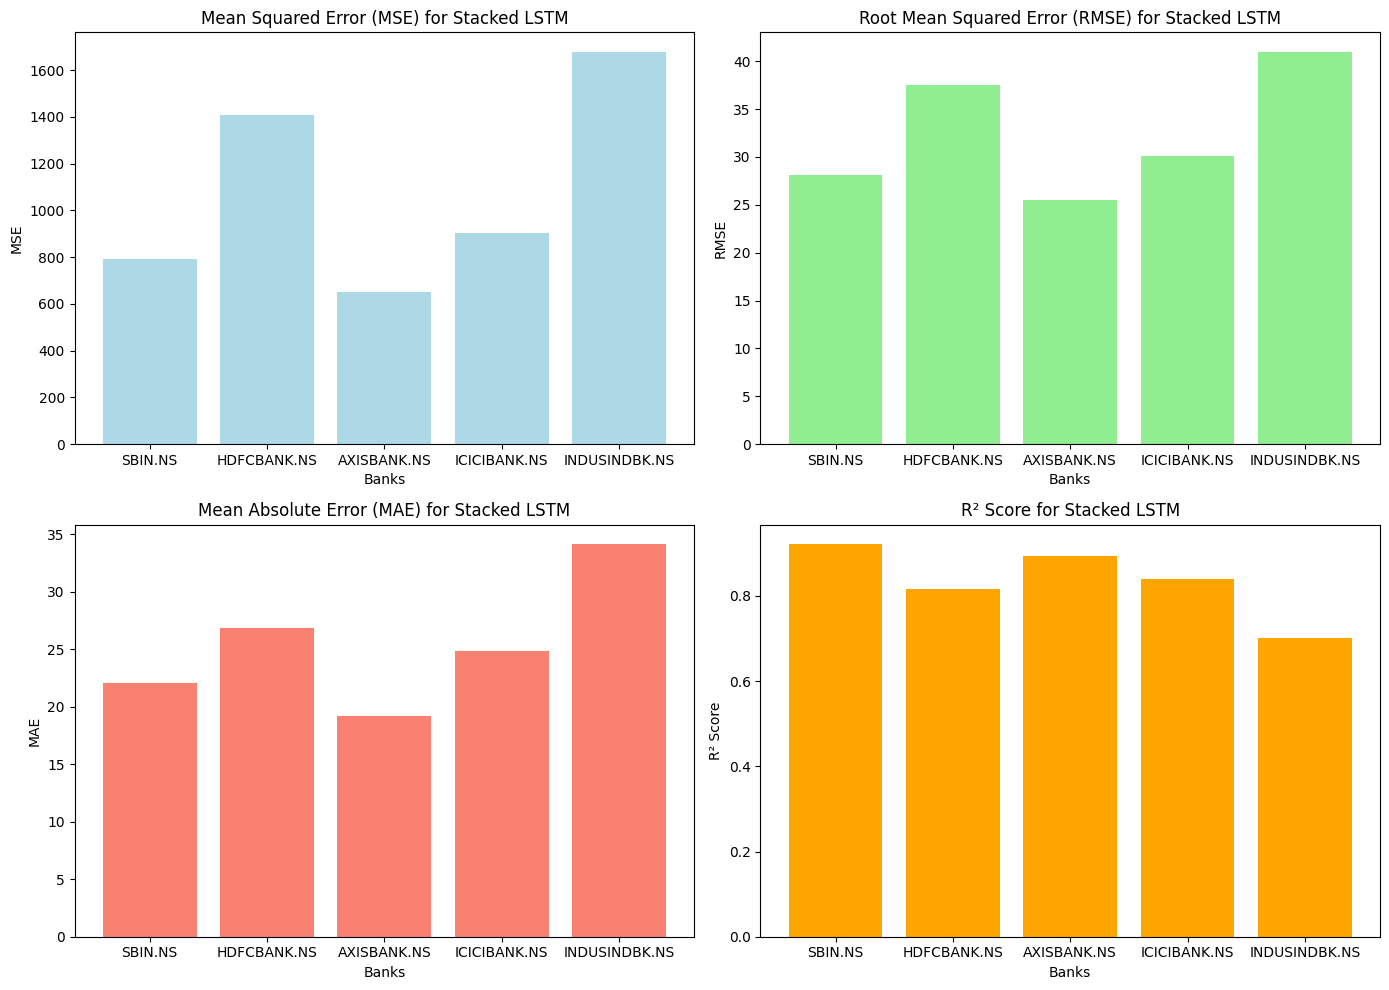

In [14]:
# Stacked LSTM model performance for different banks
stacked_lstm_data = {
    "Bank": ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'],
    "MSE": [791.330158, 1407.818533, 650.637483, 902.765389, 1677.711247],
    "RMSE": [28.130591, 37.520908, 25.507597, 30.046054, 40.959874],
    "MAE": [22.091861, 26.867082, 19.209177, 24.846191, 34.102418],
    "R² Score": [0.920708, 0.816859, 0.892681, 0.840481, 0.701240]
}

# Creating a DataFrame for Stacked LSTM
stacked_lstm_df = pd.DataFrame(stacked_lstm_data)

# Plotting the Stacked LSTM model performance
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE for Stacked LSTM
ax[0, 0].bar(stacked_lstm_df['Bank'], stacked_lstm_df['MSE'], color='lightblue')
ax[0, 0].set_title('Mean Squared Error (MSE) for Stacked LSTM')
ax[0, 0].set_xlabel('Banks')
ax[0, 0].set_ylabel('MSE')

# RMSE for Stacked LSTM
ax[0, 1].bar(stacked_lstm_df['Bank'], stacked_lstm_df['RMSE'], color='lightgreen')
ax[0, 1].set_title('Root Mean Squared Error (RMSE) for Stacked LSTM')
ax[0, 1].set_xlabel('Banks')
ax[0, 1].set_ylabel('RMSE')

# MAE for Stacked LSTM
ax[1, 0].bar(stacked_lstm_df['Bank'], stacked_lstm_df['MAE'], color='salmon')
ax[1, 0].set_title('Mean Absolute Error (MAE) for Stacked LSTM')
ax[1, 0].set_xlabel('Banks')
ax[1, 0].set_ylabel('MAE')

# R² Score for Stacked LSTM
ax[1, 1].bar(stacked_lstm_df['Bank'], stacked_lstm_df['R² Score'], color='orange')
ax[1, 1].set_title('R² Score for Stacked LSTM')
ax[1, 1].set_xlabel('Banks')
ax[1, 1].set_ylabel('R² Score')

# Adjusting layout
plt.tight_layout()
plt.show()


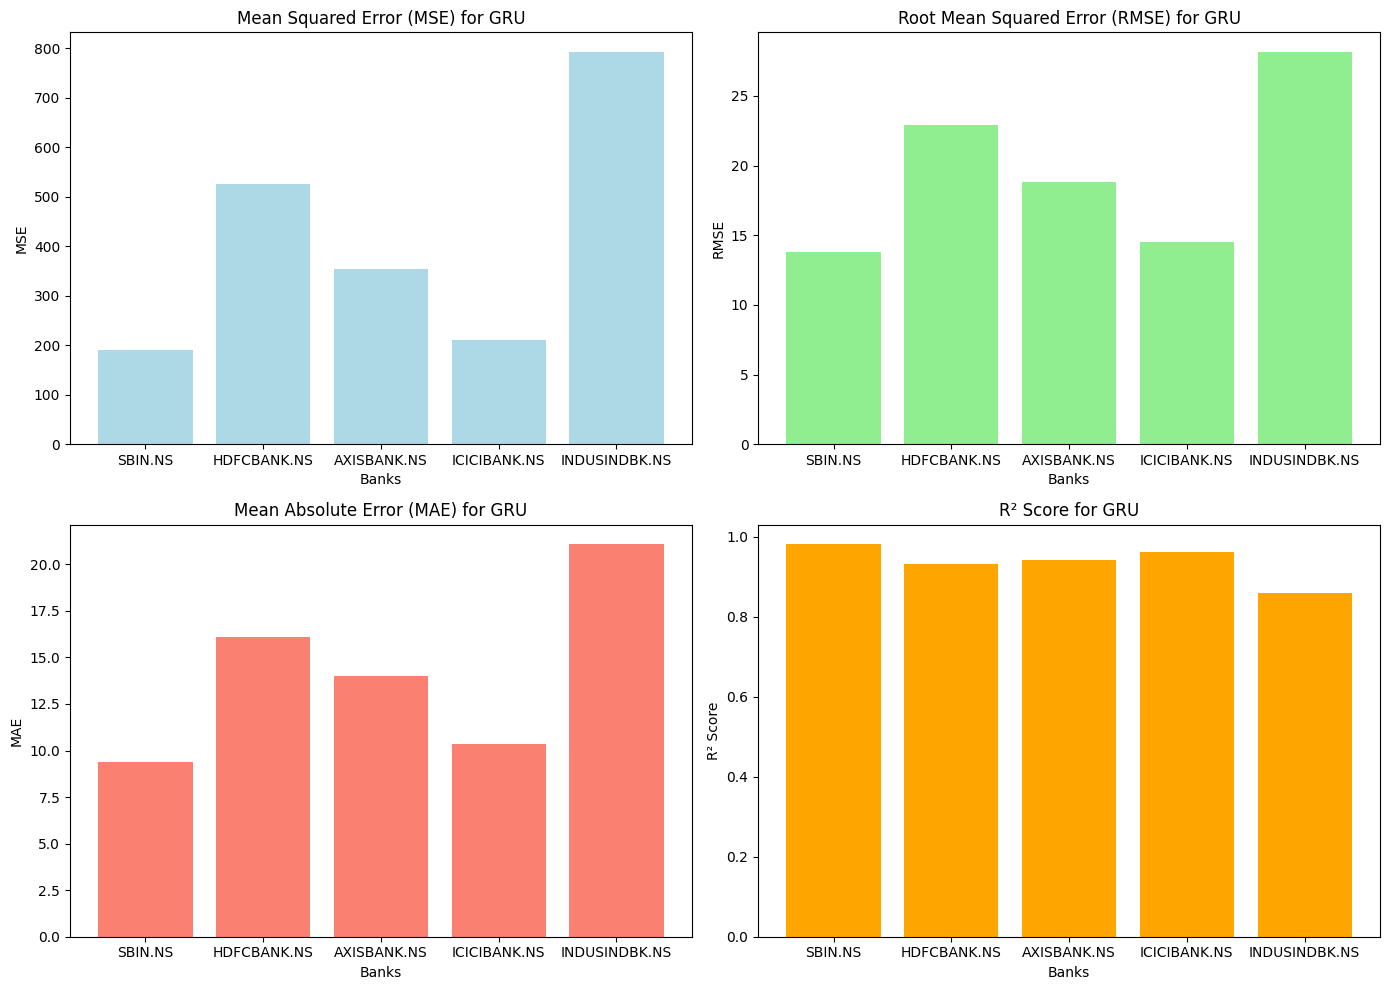

In [15]:
# GRU model performance for different banks
gru_data = {
    "Bank": ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'],
    "MSE": [190.601699, 525.381952, 354.568512, 210.616608, 792.376923],
    "RMSE": [13.805857, 22.921212, 18.829990, 14.512636, 28.149190],
    "MAE": [9.392457, 16.108553, 14.023192, 10.352316, 21.068681],
    "R² Score": [0.980901, 0.931654, 0.941516, 0.962784, 0.858897]
}

# Creating a DataFrame for GRU
gru_df = pd.DataFrame(gru_data)

# Plotting the GRU model performance
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE for GRU
ax[0, 0].bar(gru_df['Bank'], gru_df['MSE'], color='lightblue')
ax[0, 0].set_title('Mean Squared Error (MSE) for GRU')
ax[0, 0].set_xlabel('Banks')
ax[0, 0].set_ylabel('MSE')

# RMSE for GRU
ax[0, 1].bar(gru_df['Bank'], gru_df['RMSE'], color='lightgreen')
ax[0, 1].set_title('Root Mean Squared Error (RMSE) for GRU')
ax[0, 1].set_xlabel('Banks')
ax[0, 1].set_ylabel('RMSE')

# MAE for GRU
ax[1, 0].bar(gru_df['Bank'], gru_df['MAE'], color='salmon')
ax[1, 0].set_title('Mean Absolute Error (MAE) for GRU')
ax[1, 0].set_xlabel('Banks')
ax[1, 0].set_ylabel('MAE')

# R² Score for GRU
ax[1, 1].bar(gru_df['Bank'], gru_df['R² Score'], color='orange')
ax[1, 1].set_title('R² Score for GRU')
ax[1, 1].set_xlabel('Banks')
ax[1, 1].set_ylabel('R² Score')

# Adjusting layout
plt.tight_layout()
plt.show()


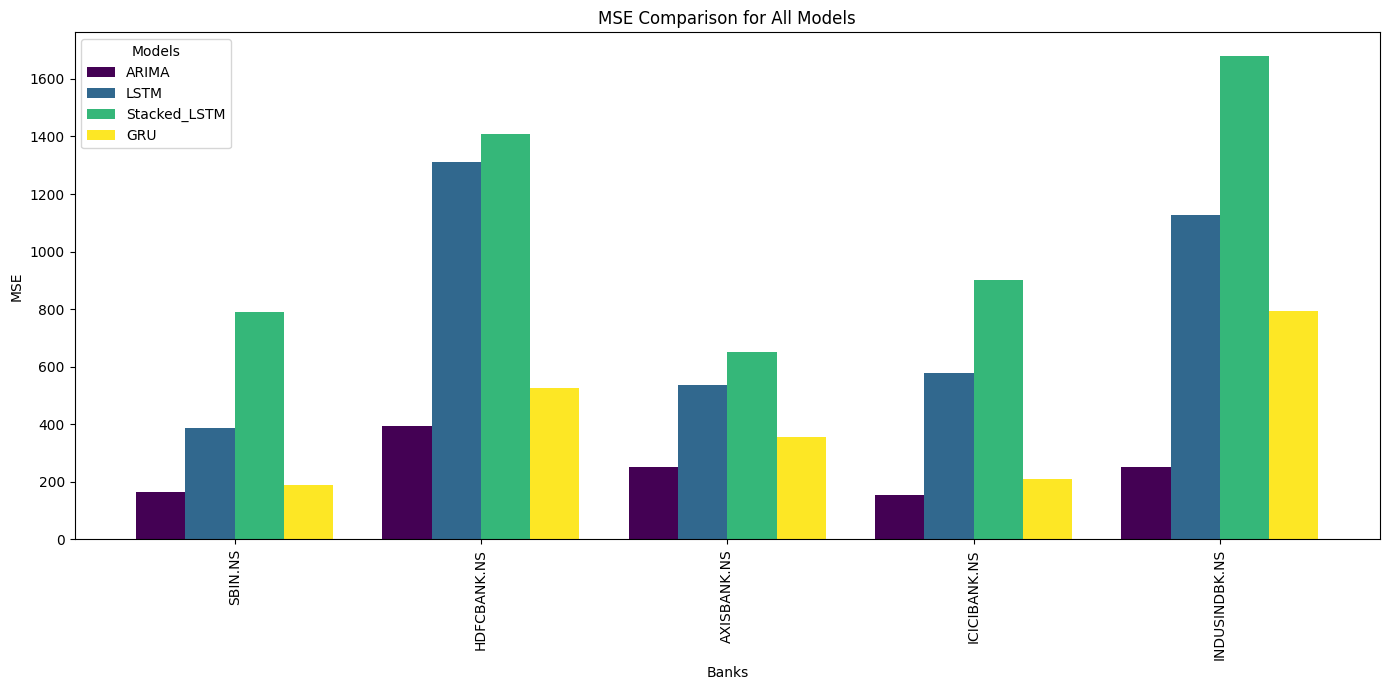

In [19]:
# Creating a comparison of all models (ARIMA, LSTM, Stacked LSTM, GRU) for each bank, showing the performance of the 4 models side by side

# Data for comparison of models for each bank
performance_data = {
    "Bank": ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'],
    "ARIMA": [163.8910, 394.2685, 250.8132, 154.0381, 250.8132],
    "LSTM": [388.466568, 1309.825561, 538.154078, 579.459547, 1127.095946],
    "Stacked_LSTM": [791.330158, 1407.818533, 650.637483, 902.765389, 1677.711247],
    "GRU": [190.601699, 525.381952, 354.568512, 210.616608, 792.376923],
}

# Creating a DataFrame for comparison
performance_df = pd.DataFrame(performance_data)

# Plotting the comparison for MSE
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Plotting MSE comparison for all models
performance_df.set_index('Bank').plot(kind='bar', ax=ax, width=0.8, colormap='viridis')
ax.set_title('MSE Comparison for All Models')
ax.set_xlabel('Banks')
ax.set_ylabel('MSE')
ax.legend(title='Models')

plt.tight_layout()
plt.show()



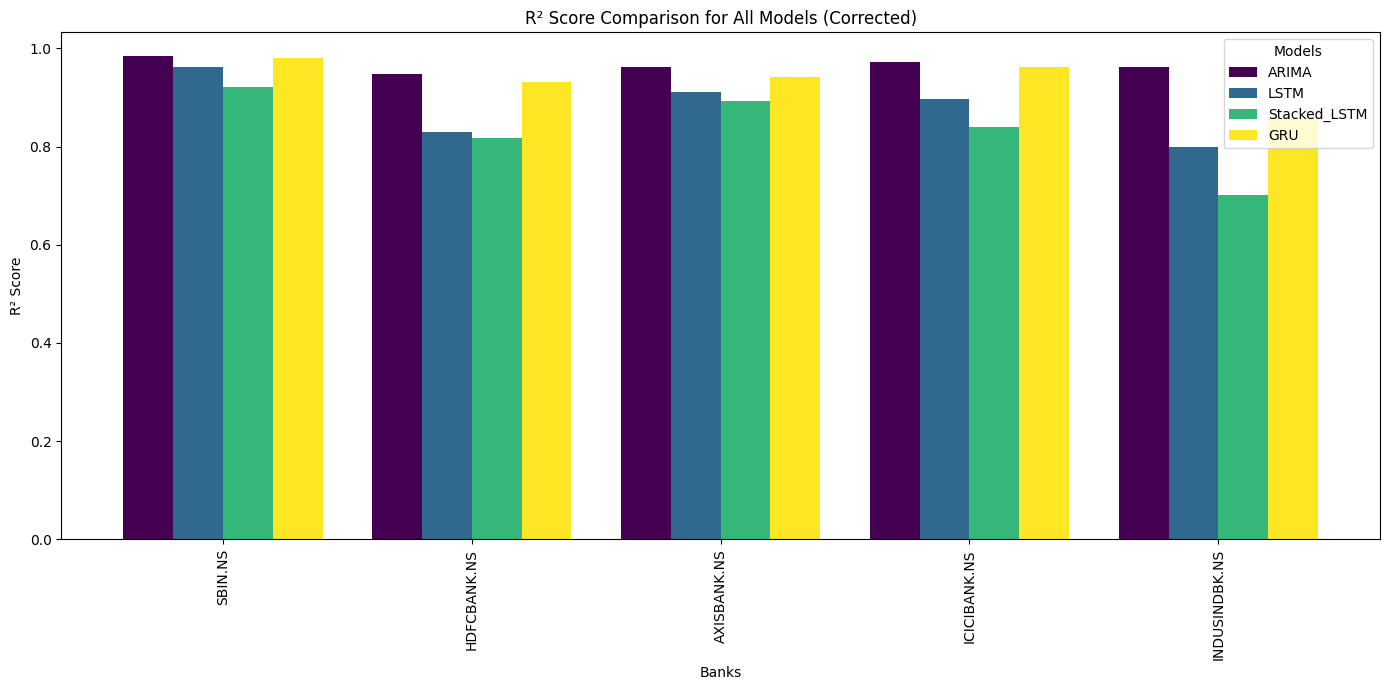

In [20]:
# Correcting the R² Score values to fit within the range [0, 1] and creating the plot for the R² Score comparison

# Data for R² Score comparison (keeping values within the range [0, 1])
r2_scores_data = {
    "Bank": ['SBIN.NS', 'HDFCBANK.NS', 'AXISBANK.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS'],
    "ARIMA": [0.9833, 0.9473, 0.9611, 0.9730, 0.9611],
    "LSTM": [0.961075, 0.829607, 0.911235, 0.897609, 0.799291],
    "Stacked_LSTM": [0.920708, 0.816859, 0.892681, 0.840481, 0.701240],
    "GRU": [0.980901, 0.931654, 0.941516, 0.962784, 0.858897],
}

# Creating a DataFrame for the R² Score comparison
r2_scores_df = pd.DataFrame(r2_scores_data)

# Plotting the R² Score comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Plotting R² score comparison for all models
r2_scores_df.set_index('Bank')[['ARIMA', 'LSTM', 'Stacked_LSTM', 'GRU']].plot(kind='bar', ax=ax, width=0.8, colormap='viridis')
ax.set_title('R² Score Comparison for All Models (Corrected)')
ax.set_xlabel('Banks')
ax.set_ylabel('R² Score')
ax.legend(title='Models')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 29ms/step


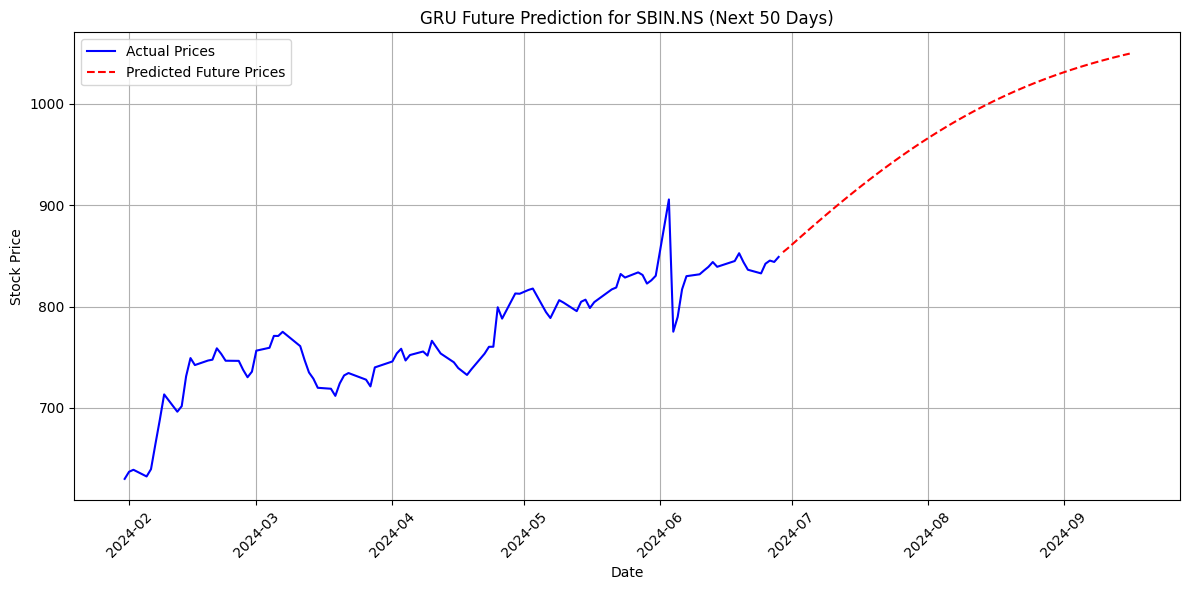

Predictions saved to sbin_gru_predictions_50days.csv


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from tensorflow.keras.models import load_model

# Function to create sequences for GRU
def create_sequences(data, time_steps=60):
    X = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
    return np.array(X)

# Function to predict future stock prices
def predict_future_stock(model, scaler, data, time_steps, future_days):
    last_data = data[-time_steps:]  # Get the last 60 days of data
    last_data = np.reshape(last_data, (1, time_steps, 1))  # Reshape for GRU input

    predicted_prices = []
    for _ in range(future_days):
        predicted_price = model.predict(last_data)
        predicted_prices.append(predicted_price[0][0])

        # Update the data for the next prediction
        predicted_price_reshaped = np.reshape(predicted_price, (1, 1, 1))  # Reshape predicted_price to be 3D
        last_data = np.append(last_data[:, 1:, :], predicted_price_reshaped, axis=1)

    # Inverse transform to the original scale
    predicted_prices_inv = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

    return predicted_prices_inv

# Load the GRU model and scaler for SBIN.NS (assumes these files exist)
model_filename = "gru_SBIN.NS.h5"  # Path to your GRU model for SBIN.NS
scaler_filename = "scaler_SBIN.NS.pkl"  # Path to your scaler for SBIN.NS

# Load the model and scaler
model = load_model(model_filename)
scaler = joblib.load(scaler_filename)

# Load the data (df) for SBIN.NS (ensure df contains the stock data for SBIN.NS)
# Example: df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
data = df[['SBIN.NS']].dropna().values  # Ensure no NaN values
data_scaled = scaler.fit_transform(data)

# Number of days to forecast (Updated to 50 days)
num_days = 80

# Predict the future stock prices for 50 days
predicted_prices = predict_future_stock(model, scaler, data_scaled, time_steps=60, future_days=num_days)

# Create future dates for plotting
last_date = df.index[-1]  # Get last date from dataset
future_dates = pd.date_range(start=last_date, periods=num_days + 1, freq='D')[1:]  # Create future dates for 50 days

# Plot actual vs predicted future stock prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df["SBIN.NS"].iloc[-100:], label="Actual Prices", color="blue")  # Plot last 100 actual prices
plt.plot(future_dates, predicted_prices, label="Predicted Future Prices", color="red", linestyle="dashed")  # Forecasted prices
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("GRU Future Prediction for SBIN.NS (Next 50 Days)")
plt.legend()
plt.grid(True)

# Format the x-axis to show dates properly
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the plot

plt.show()

# Save predictions to a CSV file
future_predictions_df = pd.DataFrame({"Date": future_dates, "Predicted Price": predicted_prices.flatten()})
future_predictions_df.to_csv("sbin_gru_predictions_50days.csv", index=False)
print("Predictions saved to sbin_gru_predictions_50days.csv")


In [19]:
predicted_prices

array([[853.6547 ],
       [857.15607],
       [860.97363],
       [864.81323],
       [868.6428 ],
       [872.4545 ],
       [876.2445 ],
       [880.0107 ],
       [883.75116],
       [887.4646 ],
       [891.1499 ],
       [894.80597],
       [898.4313 ],
       [902.0252 ],
       [905.58655],
       [909.11414],
       [912.6075 ],
       [916.0651 ],
       [919.48676],
       [922.8713 ],
       [926.2178 ],
       [929.526  ],
       [932.7947 ],
       [936.02344],
       [939.2117 ],
       [942.3585 ],
       [945.4639 ],
       [948.5269 ],
       [951.54736],
       [954.5248 ]], dtype=float32)